#Imports and Installs

In [3]:
!pip install googletrans
!python -m spacy download fr_core_news_sm
!python -m spacy download es_core_news_sm
!python -m spacy download pt_core_news_sm
!python -m spacy download it_core_news_sm
!python -m spacy download nl_core_news_sm
!python -m spacy download de_core_news_sm
!pip install textdistance
!pip install spellchecker
!pip install pyspellchecker
!pip install detect
!pip install sentence_transformers
!pip install langdetect
!pip install spacy
!pip install -U spacy
!pip install -U spacy-lookups-data
!python -m spacy download pl_core_news_md
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-06-18 19:39:54.431973: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 68.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
2023-06-18 19:40:09.401216: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 81.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
2023-06-18 19:40:22.767099: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TR

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
import string
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import textdistance
from spellchecker import SpellChecker
from langdetect import detect
from collections import defaultdict
import spacy
from wordcloud import WordCloud
import string
import warnings
warnings.filterwarnings("ignore", category=Warning)
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from googletrans import Translator
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sentence_transformers import SentenceTransformer
from tqdm import tqdm
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
nltk.download('stopwords')
import numpy as np
import scipy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader
import torch
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
import scipy
from sentence_transformers import SentenceTransformer
from tqdm import tqdm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import ast
import re
import pandas as pd
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#1- Import Data

In [3]:
df_train_reviews = pd.read_excel('train_reviews.xlsx')
df_train = pd.read_excel('train.xlsx')
df_test = pd.read_excel("test.xlsx")
df_test_reviews = pd.read_excel("test_reviews.xlsx")

#2 - Exploration

##2.1 - Text Variable Analysis

######Description

In [5]:
df_train['description_length'] = df_train['description'].apply(len)
df_train['word_count'] = df_train['description'].apply(lambda x: len(x.split()))
df_train

,index,description,host_about,unlisted,description_length,word_count
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,729,126
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1,138,23
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1,1000,167
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0,272,47
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0,659,96
...,...,...,...,...,...,...
12491,12492,CAT’S BY BAIRRO ALTO<br /><br />This cozy apar...,Travelling is one of my favorite hobbies. I've...,0,1000,163
12492,12493,Beautifully located in the heart of Lisbon's h...,Founded by travel enthusiasts (just like you) ...,0,1000,165
12493,12494,Enjoy breakfast in the sleek kitchen with its ...,I´m from Portugal and I love to dance and to t...,0,297,43
12494,12495,A Terra da Eira é uma casa de campo rodeada de...,Somos uma familia de 5. Gostamos de viajar e d...,1,715,113


In [6]:
df_train['description_length'].max()

1000

In [7]:
df_train['description_length'].min()

12

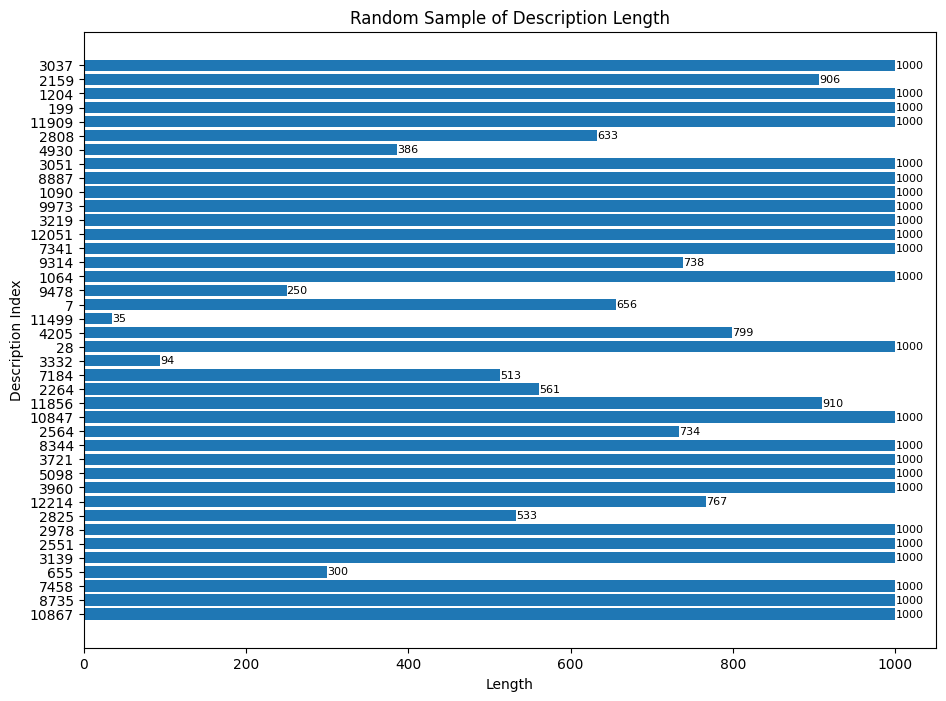

In [8]:
random_sample = df_train['description_length'].sample(40)
fig, ax1 = plt.subplots(figsize=(11, 8))
ax1.barh(range(len(random_sample)), random_sample.values, tick_label=random_sample.index)
ax1.set_xlabel('Length')
ax1.set_ylabel('Description Index')
ax1.set_title('Random Sample of Description Length')
for i, v in enumerate(random_sample.values):
    ax1.text(v, i, str(v), va='center', fontsize=8)

#####Host About

In [9]:
df_train['host_length'] = df_train['host_about'].apply(len)
df_train['host_word_count'] = df_train['host_about'].apply(lambda x: len(x.split()))
df_train

,index,description,host_about,unlisted,description_length,word_count,host_length,host_word_count
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,729,126,35,4
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1,138,23,123,24
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1,1000,167,235,43
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0,272,47,162,32
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0,659,96,224,36
...,...,...,...,...,...,...,...,...
12491,12492,CAT’S BY BAIRRO ALTO<br /><br />This cozy apar...,Travelling is one of my favorite hobbies. I've...,0,1000,163,695,122
12492,12493,Beautifully located in the heart of Lisbon's h...,Founded by travel enthusiasts (just like you) ...,0,1000,165,434,72
12493,12494,Enjoy breakfast in the sleek kitchen with its ...,I´m from Portugal and I love to dance and to t...,0,297,43,118,23
12494,12495,A Terra da Eira é uma casa de campo rodeada de...,Somos uma familia de 5. Gostamos de viajar e d...,1,715,113,102,22


In [10]:
df_train['host_length'].max()

8683

In [11]:
df_train['host_length'].min()

1

#####Comments

In [12]:
df_train_reviews['comments_length'] = df_train_reviews['comments'].apply(lambda x: len(str(x)) if isinstance(x, str) else 0)
df_train_reviews['comm_word_count'] = df_train_reviews['comments'].apply(lambda x: len(str(x).split()) if isinstance(x, str) else 0)
df_train_reviews

,index,comments,comments_length,comm_word_count
0,1,this is a very cozy and comfortable house to s...,156,28
1,1,good<br/>,9,1
2,1,"My first hostel experience, and all I have to ...",1497,261
3,1,Das Hostel war neu und deshalb funktionierte a...,615,81
4,1,"It was fine for a dorm, but I think for the pe...",132,27
...,...,...,...,...
721397,12494,"We had a good time, the apartment has a great ...",391,71
721398,12494,Great apartment in very central location. The ...,275,39
721399,12494,"We are Airbnb Super Hosts too, so trust me, Li...",221,34
721400,12494,We had a lovely stay at this apartment. Sofia ...,1599,284


In [13]:
df_train_reviews['comments_length'].max()

6403

In [14]:
df_train_reviews['comments_length'].min()

0

###2.1.1 - Word Frequency Analysis

####Description

In [15]:
all_text = ' '.join(df_train['description'])
words = all_text.split()
word_freq_d = Counter(words)
top_20_words_description = dict(word_freq_d.most_common(20))
top_20_words_description

{'the': 62717,
 'and': 54907,
 'a': 50700,
 '/><br': 34826,
 'to': 30520,
 'of': 30050,
 'in': 28007,
 'with': 27033,
 'is': 23957,
 'de': 13708,
 'apartment': 13608,
 'you': 12493,
 'for': 12364,
 '<br': 11027,
 'has': 9683,
 'space</b><br': 9622,
 '/><b>The': 9332,
 'from': 8856,
 'e': 8525,
 '/>The': 8218}

####Host About

In [16]:
all_text = ' '.join(df_train['host_about'])
words = all_text.split()
word_freq_h= Counter(words)
top_20_words_host = dict(word_freq_h.most_common(20))
top_20_words_host

{'and': 32569,
 'to': 26540,
 'the': 21488,
 'a': 21184,
 'in': 19515,
 'I': 12752,
 'of': 12752,
 'you': 12511,
 'de': 8739,
 'We': 8457,
 'e': 7880,
 'our': 7858,
 '_x000D_': 7830,
 'with': 7781,
 'for': 7728,
 'we': 6988,
 'is': 6965,
 'are': 5960,
 'have': 5632,
 'my': 5530}

####Comments

In [17]:
comments_column = df_train_reviews['comments']
comments_list = [str(comment) for comment in comments_column.tolist()]
combined_text = ' '.join(comments_list)
words = re.findall(r'\b\w+\b', combined_text)
word_freq_c = Counter(words)
top_20_words_comments = dict(word_freq_c.most_common(20))
top_20_words_comments

{'and': 1103969,
 'the': 1032367,
 'a': 798154,
 'to': 657095,
 'br': 540264,
 'in': 532497,
 'is': 514341,
 'was': 478041,
 'of': 349727,
 'The': 331214,
 'very': 313343,
 'apartment': 296065,
 'for': 286399,
 'de': 283273,
 'with': 235144,
 'you': 212919,
 'great': 206305,
 'we': 206123,
 'stay': 205184,
 'location': 192999}

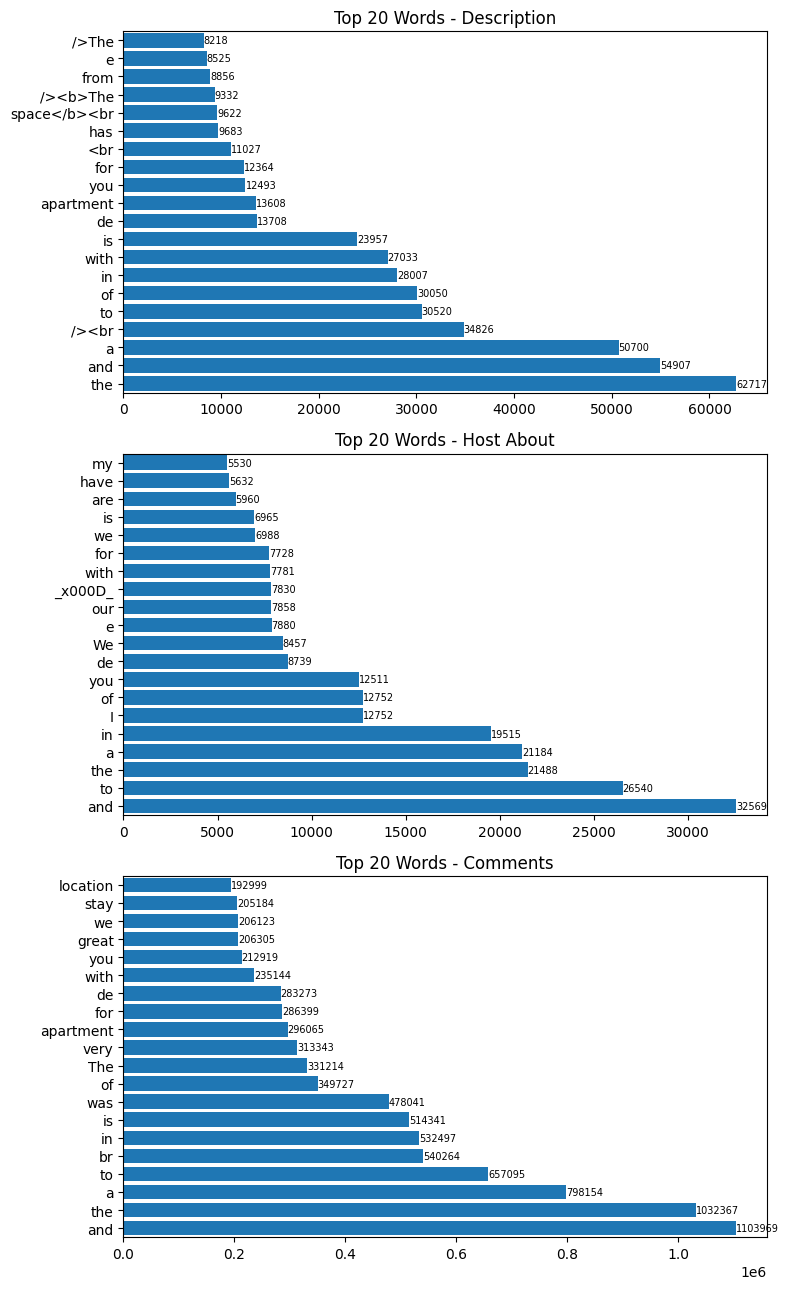

In [18]:
top_20_words_description = dict(word_freq_d.most_common(20))
top_20_words_host = dict(word_freq_h.most_common(20))
top_20_words_comments = dict(word_freq_c.most_common(20))

fig, axs = plt.subplots(3, 1, figsize=(8, 13))
axs[0].barh(list(top_20_words_description.keys()), list(top_20_words_description.values()))
axs[0].set_title('Top 20 Words - Description')
for i, (word, frequency) in enumerate(top_20_words_description.items()):
    axs[0].text(frequency, i, str(frequency), ha='left',fontsize=7, va='center')
axs[0].set_ylim(-0.5, len(top_20_words_host) - 0.5)

axs[1].barh(list(top_20_words_host.keys()), list(top_20_words_host.values()))
axs[1].set_title('Top 20 Words - Host About')
for i, (word, frequency) in enumerate(top_20_words_host.items()):
    axs[1].text(frequency, i, str(frequency), ha='left',fontsize=7, va='center')
axs[1].set_ylim(-0.5, len(top_20_words_host) - 0.5)

axs[2].barh(list(top_20_words_comments.keys()), list(top_20_words_comments.values()))
axs[2].set_title('Top 20 Words - Comments')
for i, (word, frequency) in enumerate(top_20_words_comments.items()):
    axs[2].text(frequency, i, str(frequency), ha='left',fontsize=7, va='center')
axs[2].set_ylim(-0.5, len(top_20_words_host) - 0.5)

plt.tight_layout()
plt.show()

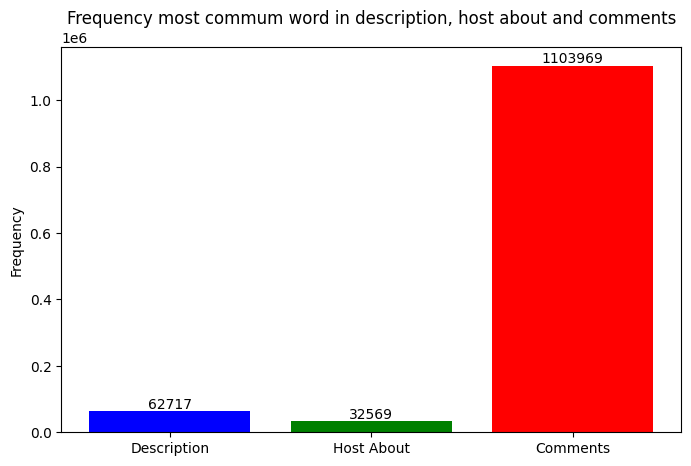

In [19]:
top_word_description = '/>The'
frequency_description = 62717
top_word_host_about = 'my'
frequency_host_about = 32569
top_word_comments = 'location'
frequency_comments = 1103969
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar([1, 2, 3], [frequency_description, frequency_host_about, frequency_comments], color=['blue', 'green', 'red'])
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['Description', 'Host About', 'Comments'])
ax.set_ylabel('Frequency')
ax.set_title('Frequency most commum word in description, host about and comments')
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.show()

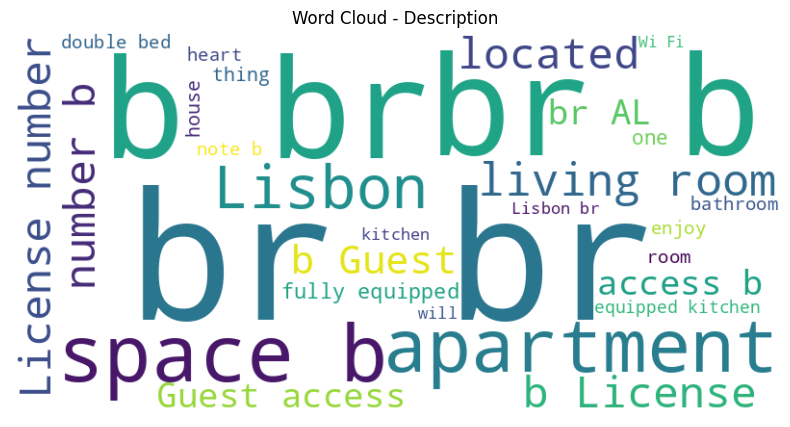

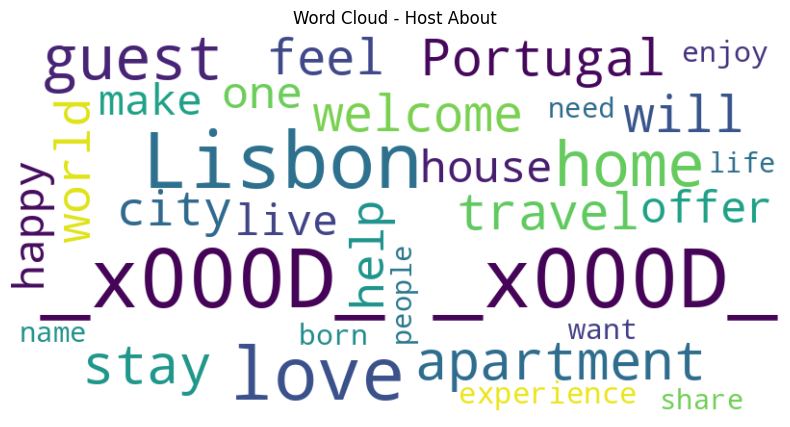

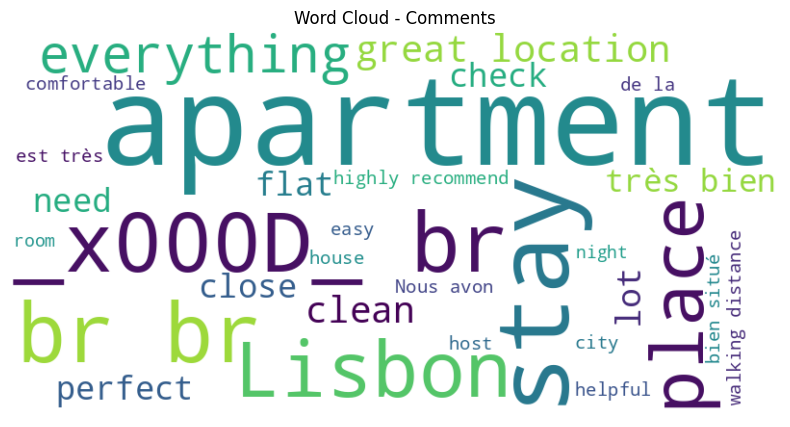

In [20]:
description_text = ' '.join(df_train['description'].astype(str))
wordcloud_description = WordCloud(width=800, height=400, max_words = 30, background_color='white').generate(description_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_description, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Description')
plt.show()

host_about_text = ' '.join(df_train['host_about'].astype(str))
wordcloud_host_about = WordCloud(width=800, height=400, max_words = 30, background_color='white').generate(host_about_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_host_about, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Host About')
plt.show()

comments_text = ' '.join(df_train_reviews['comments'].astype(str))
wordcloud_comments = WordCloud(width=800, height=400, max_words = 30 , background_color='white').generate(comments_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_comments, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Comments')
plt.show()

###2.1.2 - Sentence Length Analysis

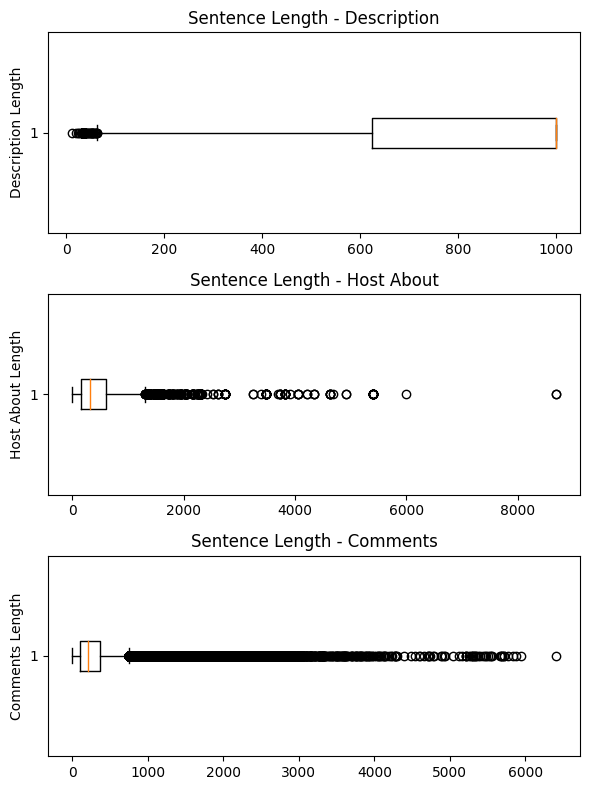

In [21]:
fig, axs = plt.subplots(3, 1, figsize=(6, 8))
# Description
axs[0].boxplot(df_train['description_length'], vert=False)
axs[0].set_ylabel('Description Length')
axs[0].set_title('Sentence Length - Description')
# Host About
axs[1].boxplot(df_train['host_length'], vert=False)
axs[1].set_ylabel('Host About Length')
axs[1].set_title('Sentence Length - Host About')
# Comments
axs[2].boxplot(df_train_reviews['comments_length'], vert=False)
axs[2].set_ylabel('Comments Length')
axs[2].set_title('Sentence Length - Comments')

plt.tight_layout()
plt.show()

- **Description Length**:  The strong presence of outliers in the lower range suggests that there might be some sentendes with very short leghts, possibly indicating incomplete or truncated sentences. These outliers could be worth investigating further to understand their nature and potential impact on the analysis. It is also possible to conclude that some sentences have relatively longer lenghts compared to the majority.

- **Host Length**: The boxplot seems to have a skewed distribution. This suggests that there are relatively fewer sentences with longer lenghts compared to the others. The presence of outliers suggests that there are a signoficant number os sentences with lenghts that are much higher than the majority. This represente cases where hosts provide more extensive information or descriptions.

- **Comments Lenght**: The distribution is very similar to the previous one, which suggests that there are relatively fewer sentences with longer lenghts compared to the others. The presented outliers could represent cases where guests provide detailed or more extense feedback.

##2.2 - Target Variable Analysis

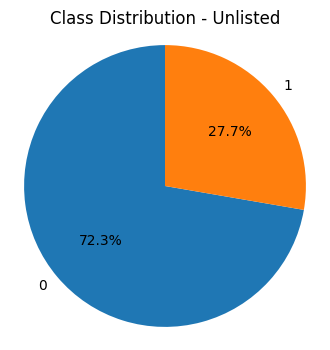

In [22]:
y = df_train['unlisted'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(y, labels=y.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Class Distribution - Unlisted')
plt.show()

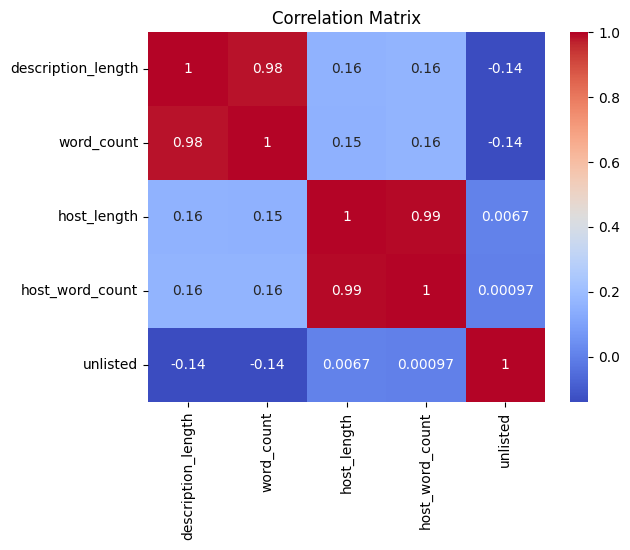

In [23]:
numerical_features = ['description_length', 'word_count', 'host_length', 'host_word_count']
correlation_matrix = df_train[numerical_features + ['unlisted']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#3 - Preprocessing Training Data

In [146]:
df_train_reviews = pd.read_excel('train_reviews.xlsx')
df_train = pd.read_excel('train.xlsx')
df_test = pd.read_excel("test.xlsx")
df_test_reviews = pd.read_excel("test_reviews.xlsx")

##Detecting Languages

In [26]:
lang_description_train_df = pd.DataFrame()
detected_languages_description = []
for index, text in enumerate(df_train['description']):
    try:
        lang = detect(text)
        detected_languages_description.append(lang)
        lang_description_train_df = lang_description_train_df.append({'index': index+1, 'language_description': lang}, ignore_index=True)
    except:
        pass

lang_description_train_df.set_index("index",inplace=True)
lang_description_train_df

,language_description
index,
1,en
2,pt
3,en
4,pt
5,fr
...,...
12492,en
12493,en
12494,en


In [28]:
lang_host_about_train_df = pd.DataFrame()
detected_languages_host_about = []
for index, text in enumerate(df_train['host_about']):
    try:
        lang = detect(text)
        detected_languages_host_about.append(lang)
        lang_host_about_train_df = lang_host_about_train_df.append({'index': index+1, 'language_host_about': lang}, ignore_index=True)
    except:
        pass

lang_host_about_train_df.set_index("index",inplace=True)
lang_host_about_train_df

,language_host_about
index,
1,pt
2,en
3,en
4,en
5,fr
...,...
12492,en
12493,en
12494,en


In [27]:
lang_comments_train_df = pd.DataFrame()
detected_languages_comments = []
for index, text in enumerate(df_train_reviews['comments']):
    try:
        lang = detect(text)
        detected_languages_comments.append(lang)
        lang_comments_train_df = lang_comments_train_df.append({'comment_index': index, 'comment_language': lang}, ignore_index=True)
    except:
        pass

In [190]:
lang_comments_train_df

NameError: ignored

##2.3 - Language Distribution

In [ ]:
languages = lang_comments_train_df['comment_language'].value_counts()
languages

In [ ]:
languages = languages.sort_values(ascending=True)
plt.figure(figsize=(10, 10))
ax = languages.plot(kind='barh')
plt.xlabel('Frequency')
plt.ylabel('Language')
plt.title('Language Distribution')
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2),
                va='center', fontsize=7)
plt.show()

In [ ]:
language_freq = lang_comments_train_df['comment_language'].value_counts().head(10)
plt.pie(language_freq.values, labels=language_freq.index, autopct='%1.1f%%')
plt.title('Language Distribution  for comments - pie chart')
plt.axis('equal')

In [ ]:
wordcloud = WordCloud(width=700, height=300, background_color='white').generate_from_frequencies(languages)
plt.figure(figsize=(7, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Language Word Cloud')
plt.axis('off')
plt.tight_layout()
plt.show()

Analyzing the 15 most frequency in description and host_about

In [ ]:
merged_df = df_train.merge(lang_comments_train_df, left_index=True, right_on='comment_index', how='inner')
language_freq = merged_df['comment_anguage'].value_counts()
top_languages = language_freq.head(10).index.tolist()
language_text = ' '.join([lang + ' ' for lang in top_languages])
wordcloud = WordCloud(background_color='white').generate(language_text)
plt.figure(figsize=(7, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Most Frequent Languages')
plt.axis('off')
plt.show()

In [119]:
lang_to_keep = ["en", "fr", "pt", "es","de","it", "nl"]

## Joining Languages to Train Dataframes

In [147]:
df_train.set_index("index", inplace=True)

In [148]:
df_train = df_train.join(lang_description_train_df)
df_train = df_train.join(lang_host_about_train_df)
df_train

,description,host_about,unlisted,language_description,language_host_about
index,,,,,
1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,pt
2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1,pt,en
3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1,en,en
4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0,pt,en
5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0,fr,fr
...,...,...,...,...,...
12492,CAT’S BY BAIRRO ALTO<br /><br />This cozy apar...,Travelling is one of my favorite hobbies. I've...,0,en,en
12493,Beautifully located in the heart of Lisbon's h...,Founded by travel enthusiasts (just like you) ...,0,en,en
12494,Enjoy breakfast in the sleek kitchen with its ...,I´m from Portugal and I love to dance and to t...,0,en,en


In [149]:
lang_comments_train_df

,comment_language
index,
0,en
1,cy
2,en
3,de
4,en
...,...
721397,en
721398,en
721399,en


In [103]:
lang_comments_train_df = lang_comments_train_df.set_index("comment_index")
lang_comments_train_df = lang_comments_train_df.rename_axis("index")
lang_comments_train_df

,comment_language
index,
0,en
1,cy
2,en
3,de
4,en
...,...
721397,en
721398,en
721399,en


In [150]:
df_train_reviews = df_train_reviews.join(lang_comments_train_df)
df_train_reviews

,index,comments,comment_language
0,1,this is a very cozy and comfortable house to s...,en
1,1,good<br/>,cy
2,1,"My first hostel experience, and all I have to ...",en
3,1,Das Hostel war neu und deshalb funktionierte a...,de
4,1,"It was fine for a dorm, but I think for the pe...",en
...,...,...,...
721397,12494,"We had a good time, the apartment has a great ...",en
721398,12494,Great apartment in very central location. The ...,en
721399,12494,"We are Airbnb Super Hosts too, so trust me, Li...",en
721400,12494,We had a lovely stay at this apartment. Sofia ...,en


##Removing less common languages

In [115]:
df_train

,description,host_about,language_description,language_host_about
index,,,,
1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,pt
2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...,pt,en
3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ...",en,en
4,Charming Apartment Close to the Bay of Cascais...,:),pt,en
5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...,fr,fr
...,...,...,...,...
1385,O melhor ponto de partida para descobrir Lisbo...,I work in Hospitality and I love traveling._x0...,en,en
1386,Casa de Baixo is a cozy and comfortable apartm...,"Visit us, stay with us and discover the most b...",en,en
1387,Beautiful and peaceful apartment with a superb...,"Nice, well travelled, educated, cult, cosmopol...",en,en


In [116]:
df_train.isna().sum()

description              0
host_about               0
language_description     0
language_host_about     14
dtype: int64

In [117]:
df_train = df_train.dropna()
df_train

,description,host_about,language_description,language_host_about
index,,,,
1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,pt
2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...,pt,en
3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ...",en,en
4,Charming Apartment Close to the Bay of Cascais...,:),pt,en
5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...,fr,fr
...,...,...,...,...
1385,O melhor ponto de partida para descobrir Lisbo...,I work in Hospitality and I love traveling._x0...,en,en
1386,Casa de Baixo is a cozy and comfortable apartm...,"Visit us, stay with us and discover the most b...",en,en
1387,Beautiful and peaceful apartment with a superb...,"Nice, well travelled, educated, cult, cosmopol...",en,en


In [120]:
df_train = df_train[df_train["language_description"].isin(lang_to_keep)]
df_train

,description,host_about,language_description,language_host_about
index,,,,
1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,pt
2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...,pt,en
3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ...",en,en
4,Charming Apartment Close to the Bay of Cascais...,:),pt,en
5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...,fr,fr
...,...,...,...,...
1385,O melhor ponto de partida para descobrir Lisbo...,I work in Hospitality and I love traveling._x0...,en,en
1386,Casa de Baixo is a cozy and comfortable apartm...,"Visit us, stay with us and discover the most b...",en,en
1387,Beautiful and peaceful apartment with a superb...,"Nice, well travelled, educated, cult, cosmopol...",en,en


In [121]:
df_train = df_train[df_train["language_host_about"].isin(lang_to_keep)]
df_train

,description,host_about,language_description,language_host_about
index,,,,
1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,pt
2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...,pt,en
3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ...",en,en
4,Charming Apartment Close to the Bay of Cascais...,:),pt,en
5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...,fr,fr
...,...,...,...,...
1385,O melhor ponto de partida para descobrir Lisbo...,I work in Hospitality and I love traveling._x0...,en,en
1386,Casa de Baixo is a cozy and comfortable apartm...,"Visit us, stay with us and discover the most b...",en,en
1387,Beautiful and peaceful apartment with a superb...,"Nice, well travelled, educated, cult, cosmopol...",en,en


In [122]:
df_train_reviews.isna().sum()

index               0
comments            0
comment_language    0
dtype: int64

In [123]:
df_train_reviews = df_train_reviews[df_train_reviews["comment_language"].isin(lang_to_keep)]

In [124]:
df_train_reviews

,index,comments,comment_language
50,5,Un très bel appartement avec une magnifique vu...,en
51,5,"Appartement refait à neuf, très confortable et...",en
52,5,"Apartamento limpio, amplio y con unas vistas i...",en
53,5,Apartamento remodelado com tudo o que é necess...,en
54,5,Mein Freund und ich waren Im August eine Woche...,en
...,...,...,...
721397,12494,"We had a good time, the apartment has a great ...",en
721398,12494,Great apartment in very central location. The ...,en
721399,12494,"We are Airbnb Super Hosts too, so trust me, Li...",en
721400,12494,We had a lovely stay at this apartment. Sofia ...,en


##Removing Ponctuation and Special Characters

In [125]:
special_characters = set()

def update_special_characters(comment):
    if isinstance(comment, str):
        special_characters.update(set(char for char in comment if not char.isalnum() and not char.isspace()))

In [126]:
def clean_sentence(sentence):
    if isinstance(sentence, str):
        for char in special_characters:
            sentence = sentence.replace(char, '')
    return sentence

In [128]:
special_characters = {"\n"}

def clean_enter(sentence):
    if isinstance(sentence, str):
        for char in special_characters:
            sentence = sentence.replace(char, ' ')
    return sentence

df_train["description"] = df_train["description"].apply(clean_enter)
df_train["host_about"] = df_train["host_about"].apply(clean_enter)
df_train_reviews["comments"] = df_train_reviews["comments"].apply(clean_enter)

In [129]:
special_characters =("<br/>","x000D")

In [130]:
df_train["description"] = df_train["description"].apply(clean_sentence)
df_train["host_about"] = df_train["host_about"].apply(clean_sentence)
df_train_reviews["comments"] = df_train_reviews["comments"].apply(clean_sentence)

In [131]:
special_characters = set()

df_train["description"].apply(update_special_characters)
df_train["host_about"].apply(update_special_characters)
df_train_reviews["comments"].apply(update_special_characters)


50        None
51        None
52        None
53        None
54        None
          ... 
721397    None
721398    None
721399    None
721400    None
721401    None
Name: comments, Length: 700630, dtype: object

In [132]:
special_characters

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 '\x96',
 '¡',
 '¢',
 '£',
 '¤',
 '¦',
 '§',
 '¨',
 '©',
 '«',
 '\xad',
 '¯',
 '°',
 '±',
 '´',
 '·',
 '»',
 '¿',
 '×',
 '˚',
 '˜',
 '˵',
 '˶',
 '̀',
 '́',
 '̂',
 '̃',
 '̈',
 '̧',
 '̫',
 '̮',
 '։',
 '׳',
 '״',
 '،',
 'ً',
 'ُ',
 'ّ',
 'ँ',
 'ं',
 '़',
 'ा',
 'ि',
 'ी',
 'ु',
 'ू',
 'े',
 'ै',
 'ो',
 'ौ',
 '्',
 '।',
 '්',
 'ා',
 'ි',
 'ූ',
 'ั',
 'ิ',
 'ี',
 'ึ',
 'ื',
 'ุ',
 'ู',
 '็',
 '่',
 '้',
 '๋',
 '์',
 '᷄',
 '᷅',
 '\u200b',
 '\u200c',
 '\u200d',
 '\u200e',
 '\u200f',
 '‐',
 '‑',
 '–',
 '—',
 '‘',
 '’',
 '‚',
 '“',
 '”',
 '„',
 '†',
 '•',
 '…',
 '\u202d',
 '‰',
 '′',
 '※',
 '‼',
 '‾',
 '⁃',
 '\u2060',
 '⁻',
 '€',
 '₽',
 '℃',
 '℅',
 '№',
 '→',
 '∀',
 '−',
 '∠',
 '≈',
 '≤',
 '≥',
 '╹',
 '▪',
 '▽',
 '◆',
 '◉',
 '◎',
 '●',
 '◡',
 '☀',
 '★',
 '☆',
 '☑',
 '☔',
 '☕',
 '☘',
 '☝',
 '☮',
 '☯',
 '☹'

In [133]:
df_train["description"] = df_train["description"].apply(clean_sentence)
df_train["host_about"] = df_train["host_about"].apply(clean_sentence)
df_train_reviews["comments"] = df_train_reviews["comments"].apply(clean_sentence)

In [134]:
special_characters = set()

df_train["description"].apply(update_special_characters)
df_train["host_about"].apply(update_special_characters)
df_train_reviews["comments"].apply(update_special_characters)
special_characters

set()

##Tokenization

In [151]:
df_train.head()

,description,host_about,unlisted,language_description,language_host_about
index,,,,,
1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,pt
2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1,pt,en
3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1,en,en
4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0,pt,en
5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0,fr,fr


In [152]:
df_train_reviews

,index,comments,comment_language
0,1,this is a very cozy and comfortable house to s...,en
1,1,good<br/>,cy
2,1,"My first hostel experience, and all I have to ...",en
3,1,Das Hostel war neu und deshalb funktionierte a...,de
4,1,"It was fine for a dorm, but I think for the pe...",en
...,...,...,...
721397,12494,"We had a good time, the apartment has a great ...",en
721398,12494,Great apartment in very central location. The ...,en
721399,12494,"We are Airbnb Super Hosts too, so trust me, Li...",en
721400,12494,We had a lovely stay at this apartment. Sofia ...,en


In [153]:
df_train['description'] = df_train['description'].apply(lambda sentence: word_tokenize(sentence))
df_train['host_about'] = df_train['host_about'].apply(lambda sentence: word_tokenize(str(sentence)) if isinstance(sentence, str) else [])
df_train_reviews['comments'] = df_train_reviews['comments'].apply(lambda sentence: word_tokenize(str(sentence)) if isinstance(sentence, str) else [])

In [154]:
df_train.head()

,description,host_about,unlisted,language_description,language_host_about
index,,,,,
1,"[This, is, a, shared, mixed, room, in, our, ho...","[Alojamento, Local, Registro, :, 20835/AL]",0,en,pt
2,"[O, meu, espaço, fica, perto, de, Parque, Edua...","[I, am, friendly, host, ,, and, I, will, try, ...",1,pt,en
3,"[Trafaria, ’, s, House, is, a, cozy, and, fami...","[I, am, a, social, person, liking, to, communi...",1,en,en
4,"[Apartamento, Charmoso, no, Chiado, ,, Entre, ...","[Hello, !, _x000D_, I, m, Portuguese, and, i, ...",0,pt,en
5,"[Joli, appartement, en, bordure, de, mer., <, ...","[Nous, sommes, une, famille, avec, deux, enfan...",0,fr,fr


In [155]:
df_train_reviews.head()

,index,comments,comment_language
0,1,"[this, is, a, very, cozy, and, comfortable, ho...",en
1,1,"[good, <, br/, >]",cy
2,1,"[My, first, hostel, experience, ,, and, all, I...",en
3,1,"[Das, Hostel, war, neu, und, deshalb, funktion...",de
4,1,"[It, was, fine, for, a, dorm, ,, but, I, think...",en


##Normalization

####Lowercasing


In [ ]:
df_train['description'] = df_train['description'].apply(lambda x: [word.lower() for word in x])
df_train['host_about'] = df_train['host_about'].apply(lambda x: [word.lower() for word in x])
df_train_reviews['comments'] = df_train_reviews['comments'].apply(lambda x: [word.lower() for word in x])


In [ ]:
df_train.head()

In [ ]:
df_train_reviews.head()

,index,comments,comment_language
0,1,"[thank, you, very, much, antonio, all, has, be...",en
1,1,"[very, nice, appartment, in, the, old, town, o...",en
2,1,"[when, travelling, were, looking, for, kids, f...",en
3,1,"[weve, been, in, lisbon, in, march, 2013, 3, a...",en
4,1,"[our, host, antonio, was, very, helpful, with,...",en


####Stopwords

In [ ]:
# Get the stopwords for each language
stopwords_en = set(stopwords.words('english'))
stopwords_fr = set(stopwords.words('french'))
stopwords_pt = set(stopwords.words('portuguese'))
stopwords_es = set(stopwords.words('spanish'))
stopwords_it = set(stopwords.words('italian'))
stopwords_de = set(stopwords.words('german'))
stopwords_nl = set(stopwords.words('dutch'))

# Function to remove stopwords based on language
def remove_stopwords(row):
    comments = row['description']
    lang = row['language_description']

    if lang == 'en':
        # Remove English stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_en]

    elif lang == 'fr':
        # Remove French stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_fr]

    elif lang == 'pt':
        # Remove Portuguese stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_pt]

    elif lang == 'es':
        # Remove Spanish stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_es]

    elif lang == 'it':
        # Remove Italian stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_it]

    elif lang == 'de':
        # Remove German stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_de]

    elif lang == 'nl':
        # Remove Dutch stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_nl]

    else:
        # If language is not supported, return the original comments as tokens
        filtered_tokens = comments

    return filtered_tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_train['description'] = df_train.apply(remove_stopwords, axis=1)
df_train

,description,host_about,language_description,language_host_about
index,,,,
1,"[bthe, spacebbr, apartment, located, historic,...","[gosto, de, viajar, de, conhecer, pessoas, gos...",en,pt
2,"[important, response, covid19, property, exten...","[we, are, the, behome, team, you, can, count, ...",en,en
3,"[bright, beautiful, spacious, fourbedroom, apa...","[hi, there, were, guestready, a, professional,...",en,en
5,"[procura, umas, férias, perto, praia, casino, ...","[bem, vindos, a, portugal, adoro, o, meu, país...",pt,pt
6,"[rustic, house, strong, typical, characteristi...","[tenho, 63, anos, e, sou, reformado, por, inva...",en,es
...,...,...,...,...
1385,"[melhor, ponto, partida, descobrir, lisboabr, ...","[i, work, in, hospitality, and, i, love, trave...",pt,en
1386,"[casa, de, baixo, cozy, comfortable, apartment...","[visit, us, stay, with, us, and, discover, the...",en,en
1387,"[beautiful, peaceful, apartment, superb, view,...","[nice, well, travelled, educated, cult, cosmop...",en,en


In [ ]:
# Function to remove stopwords based on language
def remove_stopwords(row):
    comments = row['host_about']
    lang = row['language_host_about']

    if lang == 'en':
        # Remove English stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_en]

    elif lang == 'fr':
        # Remove French stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_fr]

    elif lang == 'pt':
        # Remove Portuguese stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_pt]

    elif lang == 'es':
        # Remove Spanish stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_es]

    elif lang == 'it':
        # Remove Italian stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_it]

    elif lang == 'de':
        # Remove German stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_de]

    elif lang == 'nl':
        # Remove Dutch stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_nl]

    else:
        # If language is not supported, return the original comments as tokens
        filtered_tokens = comments

    return filtered_tokens

In [ ]:
df_train['host_about'] = df_train.apply(remove_stopwords, axis=1)
df_train

,description,host_about,language_description,language_host_about
index,,,,
1,"[bthe, spacebbr, apartment, located, historic,...","[gosto, viajar, conhecer, pessoas, gosto, rece...",en,pt
2,"[important, response, covid19, property, exten...","[behome, team, count, us, take, care, every, s...",en,en
3,"[bright, beautiful, spacious, fourbedroom, apa...","[hi, guestready, professional, property, manag...",en,en
5,"[procura, umas, férias, perto, praia, casino, ...","[bem, vindos, portugal, adoro, país, adoro, co...",pt,pt
6,"[rustic, house, strong, typical, characteristi...","[tenho, 63, anos, sou, reformado, invalidez, s...",en,es
...,...,...,...,...
1385,"[melhor, ponto, partida, descobrir, lisboabr, ...","[work, hospitality, love, traveling, photograp...",pt,en
1386,"[casa, de, baixo, cozy, comfortable, apartment...","[visit, us, stay, us, discover, beautiful, cit...",en,en
1387,"[beautiful, peaceful, apartment, superb, view,...","[nice, well, travelled, educated, cult, cosmop...",en,en


In [ ]:
# Function to remove stopwords based on language
def remove_stopwords(row):
    comments = row['comments']
    lang = row['comment_language']

    if lang == 'en':
        # Remove English stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_en]

    elif lang == 'fr':
        # Remove French stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_fr]

    elif lang == 'pt':
        # Remove Portuguese stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_pt]

    elif lang == 'es':
        # Remove Spanish stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_es]

    elif lang == 'it':
        # Remove Italian stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_it]

    elif lang == 'de':
        # Remove German stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_de]

    elif lang == 'nl':
        # Remove Dutch stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_nl]

    else:
        # If language is not supported, return the original comments as tokens
        filtered_tokens = comments

    return filtered_tokens

In [ ]:
df_train_reviews['comments'] = df_train_reviews.apply(remove_stopwords, axis=1)
df_train_reviews

,index,comments,comment_language
0,1,"[thank, much, antonio, perfect, stay, appartme...",en
1,1,"[nice, appartment, old, town, lissabon, quite,...",en
2,1,"[travelling, looking, kids, friendly, places, ...",en
3,1,"[weve, lisbon, march, 2013, 3, adults, 3, chil...",en
4,1,"[host, antonio, helpful, information, lissabon...",en
...,...,...,...
80872,1387,"[we, a, great, time, the, apartment, the, apar...",nl
80873,1387,"[excelente, apartamento, ótimo, anfitrião, apa...",nl
80874,1387,"[nice, apartment, spacius, well, equipt, and, ...",nl
80875,1388,"[unfortunately, pleasant, experience, humidity...",en


####Lemmatization

In [ ]:
# Create a WordNet lemmatizer object
nlp_en = spacy.load('en_core_web_sm')
#
nlp_fr = spacy.load('fr_core_news_sm')
# Load the Spanish language model
nlp_es = spacy.load('es_core_news_sm')
# Load the Portuguese language model
nlp_pt = spacy.load('pt_core_news_sm')
# Load the Italian language model
nlp_it = spacy.load('it_core_news_sm')
# Load the Dutch language model
nlp_nl = spacy.load('nl_core_news_sm')
# Load the German language model
nlp_de = spacy.load('de_core_news_sm')

In [ ]:
def lemmatize_sentence(words, lang):
    if lang == 'en':
        lemmas = [token.lemma_ for token in nlp_en(" ".join(words))]
    elif lang == 'fr':
        lemmas = [token.lemma_ for token in nlp_fr(" ".join(words))]
    elif lang == 'es':
        lemmas = [token.lemma_ for token in nlp_es(" ".join(words))]
    elif lang == 'pt':
        lemmas = [token.lemma_ for token in nlp_pt(" ".join(words))]
    elif lang == 'it':
        lemmas = [token.lemma_ for token in nlp_it(" ".join(words))]
    elif lang == 'nl':
        lemmas = [token.lemma_ for token in nlp_nl(" ".join(words))]
    elif lang == 'de':
        lemmas = [token.lemma_ for token in nlp_de(" ".join(words))]
    return lemmas

In [ ]:
df_train['description'] = df_train.apply(lambda row: lemmatize_sentence(row['description'], row['language_description']), axis=1)
df_train['host_about'] = df_train.apply(lambda row: lemmatize_sentence(row['host_about'], row['language_host_about']), axis=1)
df_train_reviews["comments"] = df_train_reviews.apply(lambda row: lemmatize_sentence(row['comments'], row['comment_language']), axis=1)

In [ ]:
df_train

,description,host_about,language_description,language_host_about
index,,,,
1,"[bthe, spacebbr, apartment, locate, historic, ...","[gostar, viajar, conhecer, pessoa, gostar, rec...",en,pt
2,"[important, response, covid19, property, exten...","[behome, team, count, we, take, care, every, s...",en,en
3,"[bright, beautiful, spacious, fourbedroom, apa...","[hi, guestready, professional, property, manag...",en,en
5,"[procurar, um, férias, perto, praia, casino, o...","[bem, vinr, Portugal, adorar, país, adorar, co...",pt,pt
6,"[rustic, house, strong, typical, characteristi...","[tenho, 63, ano, sou, reformado, invalidez, so...",en,es
...,...,...,...,...
1385,"[bom, ponto, partida, descobrir, lisboabr, jun...","[work, hospitality, love, travel, photography,...",pt,en
1386,"[casa, de, baixo, cozy, comfortable, apartment...","[visit, we, stay, we, discover, beautiful, cit...",en,en
1387,"[beautiful, peaceful, apartment, superb, view,...","[nice, well, travel, educate, cult, cosmopolit...",en,en


In [ ]:
df_train_reviews

,index,comments,comment_language
0,1,"[thank, much, antonio, perfect, stay, appartme...",en
1,1,"[nice, appartment, old, town, lissabon, quite,...",en
2,1,"[travel, look, kid, friendly, place, stay, ant...",en
3,1,"[we, ve, lisbon, march, 2013, 3, adult, 3, chi...",en
4,1,"[host, antonio, helpful, information, lissabon...",en
...,...,...,...
80872,1387,"[we, a, great, time, the, apartment, The, apar...",nl
80873,1387,"[excelent, apartamento, ótimo, anfitrião, Apar...",nl
80874,1387,"[nice, apartment, Spacius, Well, equipt, and, ...",nl
80875,1388,"[unfortunately, pleasant, experience, humidity...",en


##Joining Data and Concatenation

In [ ]:
df_train["string_description"] = df_train['description'].apply(lambda x: ' '.join(x))
df_train["string_host"] = df_train['host_about'].apply(lambda x: ' '.join(x))
df_train_reviews["string_comment"] = df_train_reviews['comments'].apply(lambda x: ' '.join(x))

In [ ]:
df_train_reviews = df_train_reviews.groupby('index')['string_comment'].agg(lambda x: ' '.join(x))

In [ ]:
final_train_df = df_train.join(df_train_reviews)

In [ ]:
final_train_df.isna().sum()

description               0
host_about                0
language_description      0
language_host_about       0
string_description        0
string_host               0
string_comment          431
dtype: int64

In [ ]:
final_train_df["string_comment"].fillna(" ", inplace = True)

In [ ]:
final_train_df["concat"] = final_train_df["string_host"] + " " + final_train_df["string_description"]+ " " + final_train_df["string_comment"]

In [ ]:
train_df = final_train_df[["unlisted","language_description","language_host_about","concat"]]

#4 - Modelling

##TF-IDF

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop("unlisted", axis = 1), train_df["unlisted"], test_size=0.33, random_state=42)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
# Define the TF-IDF vectorizer
tfidf = TfidfVectorizer()

# Apply TF-IDF vectorization on the "concat" column only
X_train_tfidf = tfidf.fit_transform(X_train["concat"])
X_test_tfidf = tfidf.transform(X_test["concat"])

# Extract the language columns
language_columns = X_train[["language_description", "language_host_about"]].values
language_columns_test = X_test[["language_description", "language_host_about"]].values

# One-hot encode the language columns
encoder = OneHotEncoder()
language_encoded = encoder.fit_transform(language_columns)
language_encoded_test = encoder.transform(language_columns_test)


# Concatenate the TF-IDF vectors with the one-hot encoded language columns
X_train_combined = scipy.sparse.hstack([X_train_tfidf, language_encoded])
X_test_combined = scipy.sparse.hstack([X_test_tfidf, language_encoded_test])

##### KNN

In [ ]:
# Train the KNN classifier
modelknn2 = KNeighborsClassifier(n_neighbors=10, metric='cosine', weights='distance')
modelknn2.fit(X_train_combined, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=10, weights='distance')

In [ ]:
print(f1_score(modelknn2.predict(X_test_combined), y_test))

0.3060941828254848


In [ ]:
print(accuracy_score(modelknn2.predict(X_test_combined), y_test))

0.7460076045627376


In [ ]:
print(precision_score(modelknn2.predict(X_test_combined), y_test))

0.21270452358036573


In [ ]:
print(recall_score(modelknn2.predict(X_test_combined), y_test))

0.5456790123456791


In [ ]:
print(classification_report(modelknn2.predict(X_test_combined), y_test))

              precision    recall  f1-score   support

           0       0.94      0.77      0.84      3540
           1       0.21      0.55      0.31       405

    accuracy                           0.75      3945
   macro avg       0.57      0.66      0.58      3945
weighted avg       0.86      0.75      0.79      3945



### Logistic Regression

In [ ]:
logistic_regression_model = LogisticRegression(max_iter=1000)

In [ ]:
logistic_regression_model.fit(X_train_combined, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
print(accuracy_score(logistic_regression_model.predict(X_test_combined), y_test))

0.7596958174904943


In [ ]:
print(precision_score(logistic_regression_model.predict(X_test_combined), y_test))

0.12993262752646775


In [ ]:
print(recall_score(logistic_regression_model.predict(X_test_combined), y_test))

0.7541899441340782


In [ ]:
print(f1_score(logistic_regression_model.predict(X_test_combined), y_test))

0.22167487684729062


In [ ]:
print(classification_report(logistic_regression_model.predict(X_test_combined), y_test))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86      3766
           1       0.13      0.75      0.22       179

    accuracy                           0.76      3945
   macro avg       0.56      0.76      0.54      3945
weighted avg       0.95      0.76      0.83      3945



###MLP

In [ ]:
mlp_model = MLPClassifier()

In [ ]:
mlp_model.fit(X_train_combined, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier()

In [ ]:
y_pred = mlp_model.predict(X_test_combined)

In [ ]:
print(accuracy_score(mlp_model.predict(X_test_combined), y_test))

0.7414448669201521


In [ ]:
print(precision_score(mlp_model.predict(X_test_combined), y_test))

0.38209817131857554


In [ ]:
print(recall_score(mlp_model.predict(X_test_combined), y_test))

0.512258064516129


In [ ]:
print(f1_score(mlp_model.predict(X_test_combined), y_test))

0.4377067254685777


In [ ]:
print(classification_report(mlp_model.predict(X_test_combined), y_test))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      3170
           1       0.38      0.51      0.44       775

    accuracy                           0.74      3945
   macro avg       0.63      0.65      0.63      3945
weighted avg       0.77      0.74      0.75      3945



###XGBOOST

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier()

In [ ]:
xgb_model.fit(X_train_combined, y_train)

In [ ]:
print(accuracy_score(xgb_model.predict(X_test_combined), y_test))

0.7637515842839037


In [ ]:
print(precision_score(xgb_model.predict(X_test_combined), y_test))

0.2762271414821944


In [ ]:
print(recall_score(xgb_model.predict(X_test_combined), y_test))

0.6145610278372591


In [ ]:
print(f1_score(xgb_model.predict(X_test_combined), y_test))

0.38114209827357237


In [ ]:
print(classification_report(xgb_model.predict(X_test_combined), y_test))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      3478
           1       0.28      0.61      0.38       467

    accuracy                           0.76      3945
   macro avg       0.61      0.70      0.62      3945
weighted avg       0.86      0.76      0.80      3945



###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
rf_model.fit(X_train_combined, y_train)

RandomForestClassifier()

In [ ]:
print(accuracy_score(rf_model.predict(X_test_combined), y_test))

0.7657794676806083


In [ ]:
print(precision_score(rf_model.predict(X_test_combined), y_test))

0.12415784408084697


In [ ]:
print(recall_score(rf_model.predict(X_test_combined), y_test))

0.9020979020979021


In [ ]:
print(f1_score(rf_model.predict(X_test_combined), y_test))

0.2182741116751269


##Bag-of-words(BOW)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop("unlisted", axis = 1), train_df["unlisted"], test_size=0.33, random_state=42)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
# Define the TF-IDF vectorizer
bow = CountVectorizer(binary=True)

# Apply TF-IDF vectorization on the "concat" column only
X_train_bow = bow.fit_transform(X_train["concat"])
X_test_bow = bow.transform(X_test["concat"])

# Extract the language columns
language_columns = X_train[["language_description", "language_host_about"]].values
language_columns_test = X_test[["language_description", "language_host_about"]].values

# One-hot encode the language columns
encoder = OneHotEncoder()
language_encoded = encoder.fit_transform(language_columns)
language_encoded_test = encoder.transform(language_columns_test)

# Concatenate the TF-IDF vectors with the one-hot encoded language columns
X_train_combined = scipy.sparse.hstack([X_train_bow, language_encoded])
X_test_combined = scipy.sparse.hstack([X_test_bow, language_encoded_test])

###KNN

In [ ]:
modelknn2 = KNeighborsClassifier(n_neighbors = 10, metric = 'cosine', weights = 'distance')
modelknn2.fit(X_train_combined, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=10, weights='distance')

In [ ]:
print(f1_score(modelknn2.predict(X_test_combined), y_test))

0.3723404255319149


In [ ]:
print(accuracy_score(modelknn2.predict(X_test_combined), y_test))

0.7607097591888466


In [ ]:
print(precision_score(modelknn2.predict(X_test_combined), y_test))

0.2694898941289702


In [ ]:
print(recall_score(modelknn2.predict(X_test_combined), y_test))

0.6021505376344086


In [ ]:
print(classification_report(modelknn2.predict(X_test_combined), y_test))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      3480
           1       0.27      0.60      0.37       465

    accuracy                           0.76      3945
   macro avg       0.60      0.69      0.61      3945
weighted avg       0.86      0.76      0.80      3945



###Logistic Regression

In [ ]:
logistic_regression_model = LogisticRegression(max_iter=1000)

In [ ]:
logistic_regression_model.fit(X_train_combined, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
print(accuracy_score(logistic_regression_model.predict(X_test_combined), y_test))

0.7171102661596959


In [ ]:
print(precision_score(logistic_regression_model.predict(X_test_combined), y_test))

0.4340712223291627


In [ ]:
print(recall_score(logistic_regression_model.predict(X_test_combined), y_test))

0.4606741573033708


In [ ]:
print(f1_score(logistic_regression_model.predict(X_test_combined), y_test))

0.44697720515361744


In [ ]:
print(classification_report(logistic_regression_model.predict(X_test_combined), y_test))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2966
           1       0.43      0.46      0.45       979

    accuracy                           0.72      3945
   macro avg       0.63      0.63      0.63      3945
weighted avg       0.72      0.72      0.72      3945



###MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp_model = MLPClassifier()

In [ ]:
mlp_model.fit(X_train_combined, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier()

In [ ]:
y_pred = mlp_model.predict(X_test_combined)

In [ ]:
print(accuracy_score(mlp_model.predict(X_test_combined), y_test))

0.7487959442332066


In [ ]:
print(precision_score(mlp_model.predict(X_test_combined), y_test))

0.4465832531280077


In [ ]:
print(recall_score(mlp_model.predict(X_test_combined), y_test))

0.5272727272727272


In [ ]:
print(f1_score(mlp_model.predict(X_test_combined), y_test))

0.4835852006253257


In [ ]:
print(classification_report(mlp_model.predict(X_test_combined), y_test))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      3065
           1       0.45      0.53      0.48       880

    accuracy                           0.75      3945
   macro avg       0.65      0.67      0.66      3945
weighted avg       0.77      0.75      0.76      3945



###XGBOOST

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier()

In [ ]:
xgb_model.fit(X_train_combined, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
print(accuracy_score(xgb_model.predict(X_test_combined), y_test))

0.7652724968314322


In [ ]:
print(precision_score(xgb_model.predict(X_test_combined), y_test))

0.273339749759384


In [ ]:
print(recall_score(xgb_model.predict(X_test_combined), y_test))

0.6241758241758242


In [ ]:
print(f1_score(xgb_model.predict(X_test_combined), y_test))

0.38018741633199465


In [ ]:
print(classification_report(xgb_model.predict(X_test_combined), y_test))

              precision    recall  f1-score   support

           0       0.94      0.78      0.86      3490
           1       0.27      0.62      0.38       455

    accuracy                           0.77      3945
   macro avg       0.61      0.70      0.62      3945
weighted avg       0.86      0.77      0.80      3945



###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
rf_model.fit(X_train_combined, y_train)

RandomForestClassifier()

In [ ]:
print(accuracy_score(rf_model.predict(X_test_combined), y_test))

0.7703422053231939


In [ ]:
print(precision_score(rf_model.predict(X_test_combined), y_test))

0.14436958614051973


In [ ]:
print(recall_score(rf_model.predict(X_test_combined), y_test))

0.8982035928143712


In [ ]:
print(f1_score(rf_model.predict(X_test_combined), y_test))

0.24875621890547264


In [ ]:
print(classification_report(rf_model.predict(X_test_combined), y_test))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86      3778
           1       0.14      0.90      0.25       167

    accuracy                           0.77      3945
   macro avg       0.57      0.83      0.56      3945
weighted avg       0.96      0.77      0.84      3945



##distiluse-base-multilingual-cased-v2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop("unlisted", axis = 1), train_df["unlisted"], test_size=0.33, random_state=42)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
# Instantiate the SentenceTransformer model
model = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v2')

# Function to encode the string and return the embeddings
def get_embeddings(row, column_name):
    sentence = row[column_name]
    embedding = model.encode([sentence])[0]
    return embedding

tqdm.pandas()

# Apply the function to add new columns with embeddings
X_train['concat'] = X_train.progress_apply(lambda x: get_embeddings(x, 'concat'), axis=1)
X_test['concat'] = X_test.progress_apply(lambda x: get_embeddings(x, 'concat'), axis=1)

100%|██████████| 3945/3945 [22:23<00:00,  2.94it/s]


In [ ]:
X_train_array = np.array(X_train["concat"].tolist())
X_test_array = np.array(X_test["concat"].tolist())

In [ ]:
X_train_array

array([[-0.0815182 ,  0.5121771 ,  0.5057109 , ..., -0.37959135,
        -0.15933707,  0.28829852],
       [-0.33996257,  0.559222  ,  0.60808444, ...,  0.10297912,
         0.02126401,  0.58447117],
       [-0.21837674,  0.2920177 ,  0.7229954 , ...,  0.33821273,
        -0.29822373,  0.3769628 ],
       ...,
       [-0.4299977 ,  0.07234628,  0.0899562 , ...,  0.833634  ,
        -0.02755673,  0.27900976],
       [-0.39015192,  0.43128866,  1.421629  , ...,  0.29566306,
        -0.13471612,  0.78388524],
       [ 0.1264377 ,  0.47641438,  0.90155196, ...,  0.10798548,
        -0.19454324,  0.2998982 ]], dtype=float32)

#####KNN

In [ ]:
modelknn2 = KNeighborsClassifier(n_neighbors = 10, metric = 'cosine', weights = 'distance')
modelknn2.fit(X_train_array, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=10, weights='distance')

In [ ]:
print(accuracy_score(modelknn2.predict(X_test_array), y_test))

In [ ]:
print(precision_score(modelknn2.predict(X_test_array), y_test))

In [ ]:
print(recall_score(modelknn2.predict(X_test_array), y_test))

In [ ]:
print(f1_score(modelknn2.predict(X_test_array), y_test))

In [ ]:
print(classification_report(modelknn2.predict(X_test_array), y_test))

#####Logistic Regression

In [ ]:
logistic_regression_model = LogisticRegression(max_iter=1000)

In [ ]:
logistic_regression_model.fit(X_train_array, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
print(accuracy_score(logistic_regression_model.predict(X_test_array), y_test))

In [ ]:
print(precision_score(logistic_regression_model.predict(X_test_array), y_test))

In [ ]:
print(recall_score(logistic_regression_model.predict(X_test_array), y_test))

In [ ]:
print(f1_score(logistic_regression_model.predict(X_test_array), y_test))

In [ ]:
print(classification_report(logistic_regression_model.predict(X_test_array), y_test))

#####XGBOOST

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier()

In [ ]:
xgb_model.fit(X_train_array, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
print(accuracy_score(xgb_model.predict(X_test_array), y_test))

In [ ]:
print(precision_score(xgb_model.predict(X_test_array), y_test))

In [ ]:
print(recall_score(xgb_model.predict(X_test_array), y_test))

In [ ]:
print(f1_score(xgb_model.predict(X_test_array), y_test))

In [ ]:
print(classification_report(xgb_model.predict(X_test_array), y_test))

#####Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
rf_model.fit(X_train_array, y_train)

RandomForestClassifier()

In [ ]:
print(accuracy_score(rf_model.predict(X_test_array), y_test))

In [ ]:
print(precision_score(rf_model.predict(X_test_array), y_test))

In [ ]:
print(recall_score(rf_model.predict(X_test_array), y_test))

In [ ]:
print(f1_score(rf_model.predict(X_test_array), y_test))

In [ ]:
print(classification_report(rf_model.predict(X_test_array), y_test))

#####MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp_model = MLPClassifier(max_iter=500)

In [ ]:
mlp_model.fit(X_train_array, y_train)

MLPClassifier(max_iter=500)

In [ ]:
print(accuracy_score(mlp_model.predict(X_test_array), y_test))

In [ ]:
print(precision_score(mlp_model.predict(X_test_array), y_test))

In [ ]:
print(recall_score(mlp_model.predict(X_test_array), y_test))

In [ ]:
print(f1_score(mlp_model.predict(X_test_array), y_test))

In [ ]:
print(classification_report(mlp_model.predict(X_test_array), y_test))

##stsb-xlm-r-multilingual

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop("unlisted", axis = 1), train_df["unlisted"], test_size=0.33, random_state=42)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
from sentence_transformers import SentenceTransformer
from tqdm import tqdm

In [ ]:
# Instantiate the SentenceTransformer model
model = SentenceTransformer('sentence-transformers/stsb-xlm-r-multilingual')

# Function to encode the string and return the embeddings
def get_embeddings(row, column_name):
    sentence = row[column_name]
    embedding = model.encode([sentence])[0]
    return embedding

tqdm.pandas()

# Apply the function to add new columns with embeddings
X_train['concat'] = X_train.progress_apply(lambda x: get_embeddings(x, 'concat'), axis=1)
X_test['concat'] = X_test.progress_apply(lambda x: get_embeddings(x, 'concat'), axis=1)

100%|██████████| 3945/3945 [22:23<00:00,  2.94it/s]


In [ ]:
X_train_array = np.array(X_train["concat"].tolist())
X_test_array = np.array(X_test["concat"].tolist())

In [ ]:
X_train_array

array([[-0.0815182 ,  0.5121771 ,  0.5057109 , ..., -0.37959135,
        -0.15933707,  0.28829852],
       [-0.33996257,  0.559222  ,  0.60808444, ...,  0.10297912,
         0.02126401,  0.58447117],
       [-0.21837674,  0.2920177 ,  0.7229954 , ...,  0.33821273,
        -0.29822373,  0.3769628 ],
       ...,
       [-0.4299977 ,  0.07234628,  0.0899562 , ...,  0.833634  ,
        -0.02755673,  0.27900976],
       [-0.39015192,  0.43128866,  1.421629  , ...,  0.29566306,
        -0.13471612,  0.78388524],
       [ 0.1264377 ,  0.47641438,  0.90155196, ...,  0.10798548,
        -0.19454324,  0.2998982 ]], dtype=float32)

In [ ]:
import numpy as np

# Save X_train_array as CSV
np.savetxt('X_train_array_stsb.csv', X_train_array, delimiter=',')

# Save X_test_array as CSV
np.savetxt('X_test_array_stsb.csv', X_test_array, delimiter=',')


#####KNN

In [ ]:
modelknn2 = KNeighborsClassifier(n_neighbors = 10, metric = 'cosine', weights = 'distance')
modelknn2.fit(X_train_array, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=10, weights='distance')

In [ ]:
print(accuracy_score(modelknn2.predict(X_test_array), y_test))

0.791128010139417


In [ ]:
print(precision_score(modelknn2.predict(X_test_array), y_test))

0.42829643888354185


In [ ]:
print(recall_score(modelknn2.predict(X_test_array), y_test))

0.6592592592592592


In [ ]:
print(f1_score(modelknn2.predict(X_test_array), y_test))

0.5192532088681447


In [ ]:
print(classification_report(modelknn2.predict(X_test_array), y_test))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      3270
           1       0.43      0.66      0.52       675

    accuracy                           0.79      3945
   macro avg       0.67      0.74      0.69      3945
weighted avg       0.84      0.79      0.81      3945



#####Logistic Regression

In [ ]:
logistic_regression_model = LogisticRegression(max_iter=1000)

In [ ]:
logistic_regression_model.fit(X_train_array, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
print(accuracy_score(logistic_regression_model.predict(X_test_array), y_test))

0.7596958174904943


In [ ]:
print(precision_score(logistic_regression_model.predict(X_test_array), y_test))

0.30991337824831566


In [ ]:
print(recall_score(logistic_regression_model.predict(X_test_array), y_test))

0.5822784810126582


In [ ]:
print(f1_score(logistic_regression_model.predict(X_test_array), y_test))

0.4045226130653266


In [ ]:
print(classification_report(logistic_regression_model.predict(X_test_array), y_test))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      3392
           1       0.31      0.58      0.40       553

    accuracy                           0.76      3945
   macro avg       0.62      0.69      0.63      3945
weighted avg       0.83      0.76      0.79      3945



#####XGBOOST

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier()

In [ ]:
xgb_model.fit(X_train_array, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
print(accuracy_score(xgb_model.predict(X_test_array), y_test))

0.7918884664131812


In [ ]:
print(precision_score(xgb_model.predict(X_test_array), y_test))

0.383060635226179


In [ ]:
print(recall_score(xgb_model.predict(X_test_array), y_test))

0.6885813148788927


In [ ]:
print(f1_score(xgb_model.predict(X_test_array), y_test))

0.4922696351267779


In [ ]:
print(classification_report(xgb_model.predict(X_test_array), y_test))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      3367
           1       0.38      0.69      0.49       578

    accuracy                           0.79      3945
   macro avg       0.66      0.75      0.68      3945
weighted avg       0.86      0.79      0.81      3945



#####Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
rf_model.fit(X_train_array, y_train)

RandomForestClassifier()

In [ ]:
print(accuracy_score(rf_model.predict(X_test_array), y_test))

0.8002534854245881


In [ ]:
print(precision_score(rf_model.predict(X_test_array), y_test))

0.30221366698748797


In [ ]:
print(recall_score(rf_model.predict(X_test_array), y_test))

0.8328912466843501


In [ ]:
print(f1_score(rf_model.predict(X_test_array), y_test))

0.443502824858757


In [ ]:
print(classification_report(rf_model.predict(X_test_array), y_test))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      3568
           1       0.30      0.83      0.44       377

    accuracy                           0.80      3945
   macro avg       0.64      0.81      0.66      3945
weighted avg       0.91      0.80      0.84      3945



#####MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp_model = MLPClassifier(max_iter=500)

In [ ]:
mlp_model.fit(X_train_array, y_train)

MLPClassifier(max_iter=500)

In [ ]:
print(accuracy_score(mlp_model.predict(X_test_array), y_test))

0.7579214195183777


In [ ]:
print(precision_score(mlp_model.predict(X_test_array), y_test))

0.4918190567853705


In [ ]:
print(recall_score(mlp_model.predict(X_test_array), y_test))

0.5447761194029851


In [ ]:
print(f1_score(mlp_model.predict(X_test_array), y_test))

0.5169448659585231


In [ ]:
print(classification_report(mlp_model.predict(X_test_array), y_test))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      3007
           1       0.49      0.54      0.52       938

    accuracy                           0.76      3945
   macro avg       0.67      0.68      0.68      3945
weighted avg       0.77      0.76      0.76      3945



##Results

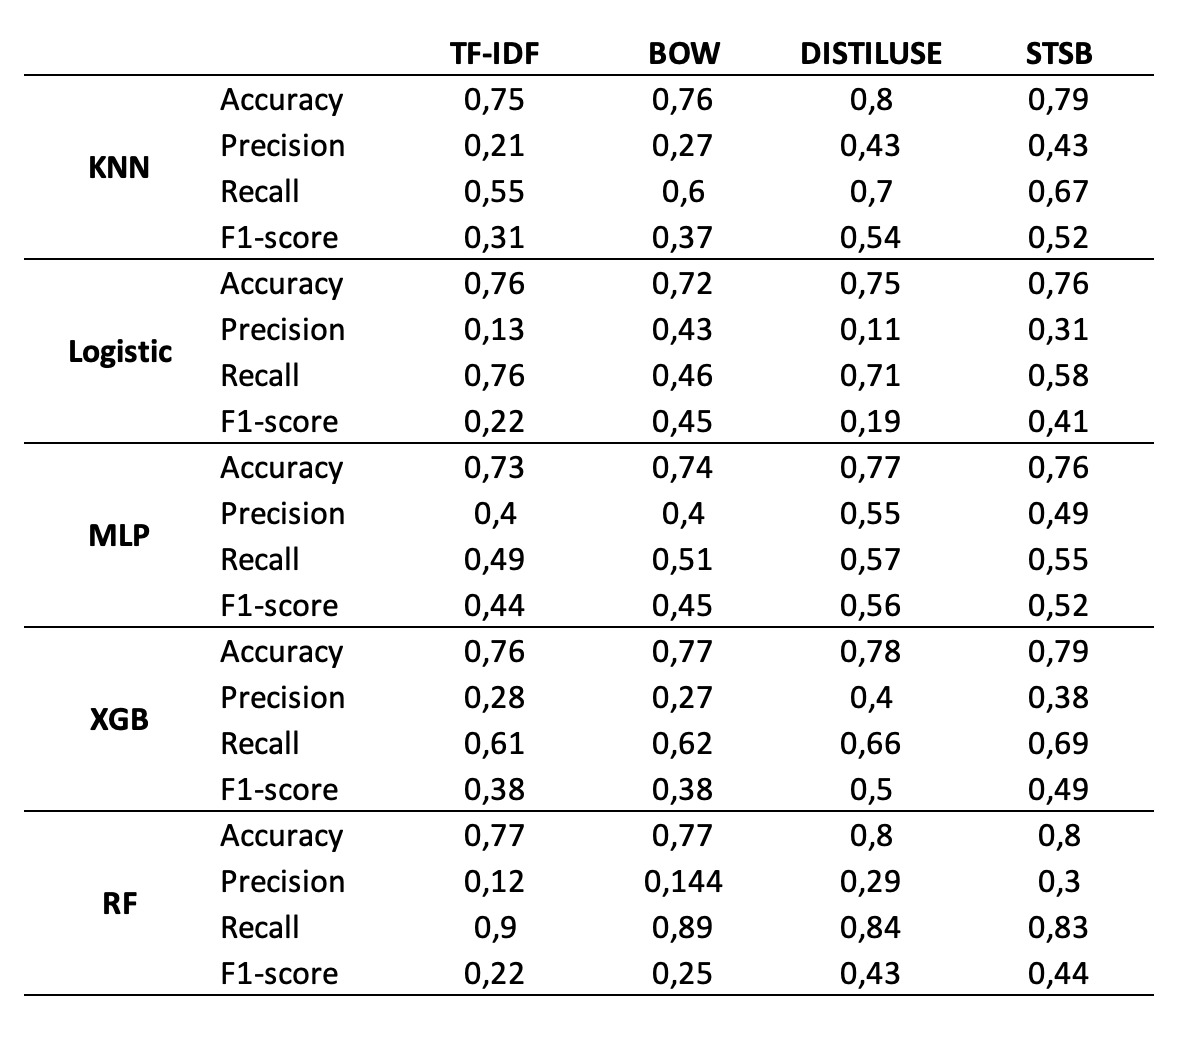

##Hypertuning Best Model (MLP + distiluse-base transformer)

In [ ]:
# Define the parameter grid to search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['adaptive'],
}

In [ ]:
grid_search = GridSearchCV(mlp_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_array, y_train)

In [ ]:
# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)

Best Hyperparameters:  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive'}
Best Accuracy Score:  0.5596287263525045


In [ ]:
best_hyperparameters = {
    'activation': 'relu',
    'alpha': 0.001,
    'hidden_layer_sizes': (100,),
    'learning_rate': 'adaptive'
}

#Ready-to-Run Final Solution

In [93]:
df_test = pd.read_excel("test.xlsx")
df_test_reviews = pd.read_excel("test_reviews.xlsx")

In [94]:
df_test.set_index("index",inplace=True)
df_test

,description,host_about
index,,
1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de..."
2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...
3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ..."
4,Charming Apartment Close to the Bay of Cascais...,:)
5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...
...,...,...
1385,O melhor ponto de partida para descobrir Lisbo...,I work in Hospitality and I love traveling._x0...
1386,Casa de Baixo is a cozy and comfortable apartm...,"Visit us, stay with us and discover the most b..."
1387,Beautiful and peaceful apartment with a superb...,"Nice, well travelled, educated, cult, cosmopol..."


In [95]:
df_test_reviews

,index,comments
0,1,Thank you very much Antonio ! All has been per...
1,1,Very nice appartment in the old town of Lissab...
2,1,When travelling we're looking for kids friendl...
3,1,We've been in Lisbon in march 2013 (3 adults a...
4,1,Our host Antonio was very helpful with informa...
...,...,...
80872,1387,We had a great time in the apartment. The apar...
80873,1387,Excelente apartamento! Ótimo anfitrião! Aparta...
80874,1387,"Nice apartment, spacius, well equipt and clean..."
80875,1388,Unfortunately not a pleasant experience. The h...


##Preprocessing Test Data

###Detecting Languages

In [96]:
lang_description_df = pd.DataFrame()
detected_languages_description = []
for index, text in enumerate(df_test['description']):
    try:
        lang = detect(text)
        detected_languages_description.append(lang)
        lang_description_df = lang_description_df.append({'index': index+1, 'language_description': lang}, ignore_index=True)
    except:
        pass

lang_description_df.set_index("index",inplace=True)
lang_description_df

,language_description
index,
1,en
2,en
3,en
4,en
5,pt
...,...
1385,pt
1386,en
1387,en


In [97]:
lang_host_about_df = pd.DataFrame()
detected_languages_host_about = []
for index, text in enumerate(df_test['host_about']):
    try:
        lang = detect(text)
        detected_languages_host_about.append(lang)
        lang_host_about_df = lang_host_about_df.append({'index': index+1, 'language_host_about': lang}, ignore_index=True)
    except:
        pass

lang_host_about_df.set_index("index",inplace=True)
lang_host_about_df

,language_host_about
index,
1,pt
2,en
3,en
5,pt
6,es
...,...
1385,en
1386,en
1387,en


In [98]:
lang_comments_df = pd.DataFrame()
detected_languages_comments = []
for index, text in enumerate(df_test_reviews['comments']):
    try:
        lang = detect(text)
        detected_languages_comments.append(lang)
        lang_comments_df = lang_comments_df.append({'comment_index': index, 'comment_language': lang}, ignore_index=True)
    except:
        pass

In [99]:
lang_comments_df

,comment_index,comment_language
0,0,en
1,1,en
2,2,en
3,3,en
4,4,en
...,...,...
80637,80872,en
80638,80873,pt
80639,80874,en
80640,80875,en


###Joining Languages to Dataframes

In [100]:
lang_to_keep = ["en", "fr", "pt", "es","de","it", "nl"]

In [101]:
df_test = df_test.join(lang_description_df)

In [102]:
df_test = df_test.join(lang_host_about_df)
df_test

,description,host_about,language_description,language_host_about
index,,,,
1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,pt
2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...,en,en
3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ...",en,en
4,Charming Apartment Close to the Bay of Cascais...,:),en,NaN
5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...,pt,pt
...,...,...,...,...
1385,O melhor ponto de partida para descobrir Lisbo...,I work in Hospitality and I love traveling._x0...,pt,en
1386,Casa de Baixo is a cozy and comfortable apartm...,"Visit us, stay with us and discover the most b...",en,en
1387,Beautiful and peaceful apartment with a superb...,"Nice, well travelled, educated, cult, cosmopol...",en,en


In [103]:
lang_comments_df = lang_comments_df.set_index("comment_index")
lang_comments_df = lang_comments_df.rename_axis("index")
lang_comments_df

,comment_language
index,
0,en
1,en
2,en
3,en
4,en
...,...
80872,en
80873,pt
80874,en


In [104]:
df_test_reviews = df_test_reviews.join(lang_comments_df)


###Removing less common languages

In [108]:
df_test

,description,host_about,language_description,language_host_about
index,,,,
1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,pt
2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...,en,en
3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ...",en,en
4,Charming Apartment Close to the Bay of Cascais...,:),en,NaN
5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...,pt,pt
...,...,...,...,...
1385,O melhor ponto de partida para descobrir Lisbo...,I work in Hospitality and I love traveling._x0...,pt,en
1386,Casa de Baixo is a cozy and comfortable apartm...,"Visit us, stay with us and discover the most b...",en,en
1387,Beautiful and peaceful apartment with a superb...,"Nice, well travelled, educated, cult, cosmopol...",en,en


In [109]:
df_test.isna().sum()

description              0
host_about               0
language_description     0
language_host_about     17
dtype: int64

In [110]:
df_test = df_test.dropna()
df_test

,description,host_about,language_description,language_host_about
index,,,,
1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,pt
2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...,en,en
3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ...",en,en
5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...,pt,pt
6,Rustic house with strong typical characteristi...,Tenho 63 anos e sou reformado por invalidez. S...,en,es
...,...,...,...,...
1385,O melhor ponto de partida para descobrir Lisbo...,I work in Hospitality and I love traveling._x0...,pt,en
1386,Casa de Baixo is a cozy and comfortable apartm...,"Visit us, stay with us and discover the most b...",en,en
1387,Beautiful and peaceful apartment with a superb...,"Nice, well travelled, educated, cult, cosmopol...",en,en


In [111]:
df_test = df_test[df_test["language_description"].isin(lang_to_keep)]
df_test

,description,host_about,language_description,language_host_about
index,,,,
1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,pt
2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...,en,en
3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ...",en,en
5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...,pt,pt
6,Rustic house with strong typical characteristi...,Tenho 63 anos e sou reformado por invalidez. S...,en,es
...,...,...,...,...
1385,O melhor ponto de partida para descobrir Lisbo...,I work in Hospitality and I love traveling._x0...,pt,en
1386,Casa de Baixo is a cozy and comfortable apartm...,"Visit us, stay with us and discover the most b...",en,en
1387,Beautiful and peaceful apartment with a superb...,"Nice, well travelled, educated, cult, cosmopol...",en,en


In [112]:
df_test = df_test[df_test["language_host_about"].isin(lang_to_keep)]
df_test

,description,host_about,language_description,language_host_about
index,,,,
1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,pt
2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...,en,en
3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ...",en,en
5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...,pt,pt
6,Rustic house with strong typical characteristi...,Tenho 63 anos e sou reformado por invalidez. S...,en,es
...,...,...,...,...
1385,O melhor ponto de partida para descobrir Lisbo...,I work in Hospitality and I love traveling._x0...,pt,en
1386,Casa de Baixo is a cozy and comfortable apartm...,"Visit us, stay with us and discover the most b...",en,en
1387,Beautiful and peaceful apartment with a superb...,"Nice, well travelled, educated, cult, cosmopol...",en,en


In [113]:
df_test_reviews.isna().sum()

index                 0
comments              0
comment_language    235
dtype: int64

In [114]:
df_test_reviews = df_test_reviews[df_test_reviews["comment_language"].isin(lang_to_keep)]

In [115]:
df_test_reviews

,index,comments,comment_language
0,1,Thank you very much Antonio ! All has been per...,en
1,1,Very nice appartment in the old town of Lissab...,en
2,1,When travelling we're looking for kids friendl...,en
3,1,We've been in Lisbon in march 2013 (3 adults a...,en
4,1,Our host Antonio was very helpful with informa...,en
...,...,...,...
80872,1387,We had a great time in the apartment. The apar...,en
80873,1387,Excelente apartamento! Ótimo anfitrião! Aparta...,pt
80874,1387,"Nice apartment, spacius, well equipt and clean...",en
80875,1388,Unfortunately not a pleasant experience. The h...,en


###Removing Ponctuation and Special Characters

In [116]:
special_characters = set()

def update_special_characters(comment):
    if isinstance(comment, str):
        special_characters.update(set(char for char in comment if not char.isalnum() and not char.isspace()))

In [117]:
def clean_sentence(sentence):
    if isinstance(sentence, str):
        for char in special_characters:
            sentence = sentence.replace(char, '')
    return sentence

In [118]:
special_characters = {"\n"}

def clean_enter(sentence):
    if isinstance(sentence, str):
        for char in special_characters:
            sentence = sentence.replace(char, ' ')
    return sentence

df_test["description"] = df_test["description"].apply(clean_enter)
df_test["host_about"] = df_test["host_about"].apply(clean_enter)
df_test_reviews["comments"] = df_test_reviews["comments"].apply(clean_enter)

In [119]:
special_characters =("<br/>","x000D")

In [120]:
df_test["description"] = df_test["description"].apply(clean_sentence)
df_test["host_about"] = df_test["host_about"].apply(clean_sentence)
df_test_reviews["comments"] = df_test_reviews["comments"].apply(clean_sentence)

In [121]:
special_characters = set()

df_test["description"].apply(update_special_characters)
df_test["host_about"].apply(update_special_characters)
df_test_reviews["comments"].apply(update_special_characters)


0        None
1        None
2        None
3        None
4        None
         ... 
80872    None
80873    None
80874    None
80875    None
80876    None
Name: comments, Length: 78613, dtype: object

In [122]:
special_characters

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '|',
 '~',
 '¡',
 '£',
 '«',
 '°',
 '±',
 '´',
 '·',
 '»',
 '¿',
 '×',
 '́',
 '̃',
 '̧',
 '\u200b',
 '\u200c',
 '\u200d',
 '\u200e',
 '–',
 '—',
 '‘',
 '’',
 '‚',
 '“',
 '”',
 '„',
 '•',
 '…',
 '⁃',
 '\u2060',
 '₩',
 '€',
 '→',
 '▽',
 '●',
 '☀',
 '★',
 '☑',
 '☕',
 '☝',
 '☺',
 '☼',
 '♀',
 '♂',
 '♡',
 '♥',
 '⛵',
 '✅',
 '✌',
 '✔',
 '✨',
 '❣',
 '❤',
 '➽',
 '⭐',
 '、',
 '。',
 '\uf04a',
 '️',
 '\ufeff',
 '！',
 '（',
 '）',
 '，',
 '＾',
 '～',
 '､',
 '￫',
 '🇦',
 '🇨',
 '🇩',
 '🇪',
 '🇵',
 '🇹',
 '🇺',
 '🇿',
 '🌈',
 '🌊',
 '🌞',
 '🌟',
 '🌱',
 '🌴',
 '🌷',
 '🌸',
 '🌹',
 '🌺',
 '🌻',
 '🌼',
 '🌿',
 '🍓',
 '🍕',
 '🍷',
 '🎁',
 '🎉',
 '🎶',
 '🏄',
 '🏅',
 '🏖',
 '🏡',
 '🏳',
 '🏴',
 '🏻',
 '🏼',
 '🏽',
 '🏾',
 '🏿',
 '🐶',
 '🐾',
 '👋',
 '👌',
 '👍',
 '👎',
 '👏',
 '👭',
 '💋',
 '💎',
 '💏',
 '💕',
 '💖',
 '💗',
 '💙',
 '💚',
 '💛',
 '💜',
 '💞',
 '💦',
 '💪',
 '💫',
 '💯',
 '📍',
 '📖',
 '🔝'

In [123]:
df_test["description"] = df_test["description"].apply(clean_sentence)
df_test["host_about"] = df_test["host_about"].apply(clean_sentence)
df_test_reviews["comments"] = df_test_reviews["comments"].apply(clean_sentence)

In [124]:
special_characters = set()

df_test["description"].apply(update_special_characters)
df_test["host_about"].apply(update_special_characters)
df_test_reviews["comments"].apply(update_special_characters)
special_characters

set()

###Tokenization

In [125]:
df_test.head()

,description,host_about,language_description,language_host_about
index,,,,
1,bThe spacebbr Apartment located in the histori...,Gosto de viajar de conhecer pessoas gosto de r...,en,pt
2,IMPORTANT In response to COVID19 this property...,We are the behome Team You can count on us to...,en,en
3,Bright beautiful and spacious This fourbedroom...,Hi there Were GuestReady a professional prope...,en,en
5,Se procura umas férias perto da praia casino e...,Bem vindos a Portugal Adoro o meu País mas tam...,pt,pt
6,Rustic house with strong typical characteristi...,Tenho 63 anos e sou reformado por invalidez So...,en,es


In [126]:
df_test_reviews.head()

,index,comments,comment_language
0,1,Thank you very much Antonio All has been perf...,en
1,1,Very nice appartment in the old town of Lissab...,en
2,1,When travelling were looking for kids friendly...,en
3,1,Weve been in Lisbon in march 2013 3 adults and...,en
4,1,Our host Antonio was very helpful with informa...,en


In [127]:
df_test['description'] = df_test['description'].apply(lambda sentence: word_tokenize(sentence))
df_test['host_about'] = df_test['host_about'].apply(lambda sentence: word_tokenize(str(sentence)) if isinstance(sentence, str) else [])
df_test_reviews['comments'] = df_test_reviews['comments'].apply(lambda sentence: word_tokenize(str(sentence)) if isinstance(sentence, str) else [])

In [128]:
df_test.head()

,description,host_about,language_description,language_host_about
index,,,,
1,"[bThe, spacebbr, Apartment, located, in, the, ...","[Gosto, de, viajar, de, conhecer, pessoas, gos...",en,pt
2,"[IMPORTANT, In, response, to, COVID19, this, p...","[We, are, the, behome, Team, You, can, count, ...",en,en
3,"[Bright, beautiful, and, spacious, This, fourb...","[Hi, there, Were, GuestReady, a, professional,...",en,en
5,"[Se, procura, umas, férias, perto, da, praia, ...","[Bem, vindos, a, Portugal, Adoro, o, meu, País...",pt,pt
6,"[Rustic, house, with, strong, typical, charact...","[Tenho, 63, anos, e, sou, reformado, por, inva...",en,es


In [129]:
df_test_reviews.head()

,index,comments,comment_language
0,1,"[Thank, you, very, much, Antonio, All, has, be...",en
1,1,"[Very, nice, appartment, in, the, old, town, o...",en
2,1,"[When, travelling, were, looking, for, kids, f...",en
3,1,"[Weve, been, in, Lisbon, in, march, 2013, 3, a...",en
4,1,"[Our, host, Antonio, was, very, helpful, with,...",en


###Normalization

#####Lowercasing


In [130]:
df_test['description'] = df_test['description'].apply(lambda x: [word.lower() for word in x])
df_test['host_about'] = df_test['host_about'].apply(lambda x: [word.lower() for word in x])
df_test_reviews['comments'] = df_test_reviews['comments'].apply(lambda x: [word.lower() for word in x])


In [131]:
df_test.head()

,description,host_about,language_description,language_host_about
index,,,,
1,"[bthe, spacebbr, apartment, located, in, the, ...","[gosto, de, viajar, de, conhecer, pessoas, gos...",en,pt
2,"[important, in, response, to, covid19, this, p...","[we, are, the, behome, team, you, can, count, ...",en,en
3,"[bright, beautiful, and, spacious, this, fourb...","[hi, there, were, guestready, a, professional,...",en,en
5,"[se, procura, umas, férias, perto, da, praia, ...","[bem, vindos, a, portugal, adoro, o, meu, país...",pt,pt
6,"[rustic, house, with, strong, typical, charact...","[tenho, 63, anos, e, sou, reformado, por, inva...",en,es


In [132]:
df_test_reviews.head()

,index,comments,comment_language
0,1,"[thank, you, very, much, antonio, all, has, be...",en
1,1,"[very, nice, appartment, in, the, old, town, o...",en
2,1,"[when, travelling, were, looking, for, kids, f...",en
3,1,"[weve, been, in, lisbon, in, march, 2013, 3, a...",en
4,1,"[our, host, antonio, was, very, helpful, with,...",en


#####Stopwords

In [133]:
# Get the stopwords for each language
stopwords_en = set(stopwords.words('english'))
stopwords_fr = set(stopwords.words('french'))
stopwords_pt = set(stopwords.words('portuguese'))
stopwords_es = set(stopwords.words('spanish'))
stopwords_it = set(stopwords.words('italian'))
stopwords_de = set(stopwords.words('german'))
stopwords_nl = set(stopwords.words('dutch'))

# Function to remove stopwords based on language
def remove_stopwords(row):
    comments = row['description']
    lang = row['language_description']

    if lang == 'en':
        # Remove English stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_en]

    elif lang == 'fr':
        # Remove French stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_fr]

    elif lang == 'pt':
        # Remove Portuguese stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_pt]

    elif lang == 'es':
        # Remove Spanish stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_es]

    elif lang == 'it':
        # Remove Italian stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_it]

    elif lang == 'de':
        # Remove German stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_de]

    elif lang == 'nl':
        # Remove Dutch stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_nl]

    else:
        # If language is not supported, return the original comments as tokens
        filtered_tokens = comments

    return filtered_tokens

In [134]:
df_test['description'] = df_test.apply(remove_stopwords, axis=1)
df_test

,description,host_about,language_description,language_host_about
index,,,,
1,"[bthe, spacebbr, apartment, located, historic,...","[gosto, de, viajar, de, conhecer, pessoas, gos...",en,pt
2,"[important, response, covid19, property, exten...","[we, are, the, behome, team, you, can, count, ...",en,en
3,"[bright, beautiful, spacious, fourbedroom, apa...","[hi, there, were, guestready, a, professional,...",en,en
5,"[procura, umas, férias, perto, praia, casino, ...","[bem, vindos, a, portugal, adoro, o, meu, país...",pt,pt
6,"[rustic, house, strong, typical, characteristi...","[tenho, 63, anos, e, sou, reformado, por, inva...",en,es
...,...,...,...,...
1385,"[melhor, ponto, partida, descobrir, lisboabr, ...","[i, work, in, hospitality, and, i, love, trave...",pt,en
1386,"[casa, de, baixo, cozy, comfortable, apartment...","[visit, us, stay, with, us, and, discover, the...",en,en
1387,"[beautiful, peaceful, apartment, superb, view,...","[nice, well, travelled, educated, cult, cosmop...",en,en


In [135]:
# Function to remove stopwords based on language
def remove_stopwords(row):
    comments = row['host_about']
    lang = row['language_host_about']

    if lang == 'en':
        # Remove English stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_en]

    elif lang == 'fr':
        # Remove French stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_fr]

    elif lang == 'pt':
        # Remove Portuguese stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_pt]

    elif lang == 'es':
        # Remove Spanish stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_es]

    elif lang == 'it':
        # Remove Italian stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_it]

    elif lang == 'de':
        # Remove German stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_de]

    elif lang == 'nl':
        # Remove Dutch stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_nl]

    else:
        # If language is not supported, return the original comments as tokens
        filtered_tokens = comments

    return filtered_tokens

In [136]:
df_test['host_about'] = df_test.apply(remove_stopwords, axis=1)
df_test

,description,host_about,language_description,language_host_about
index,,,,
1,"[bthe, spacebbr, apartment, located, historic,...","[gosto, viajar, conhecer, pessoas, gosto, rece...",en,pt
2,"[important, response, covid19, property, exten...","[behome, team, count, us, take, care, every, s...",en,en
3,"[bright, beautiful, spacious, fourbedroom, apa...","[hi, guestready, professional, property, manag...",en,en
5,"[procura, umas, férias, perto, praia, casino, ...","[bem, vindos, portugal, adoro, país, adoro, co...",pt,pt
6,"[rustic, house, strong, typical, characteristi...","[tenho, 63, anos, sou, reformado, invalidez, s...",en,es
...,...,...,...,...
1385,"[melhor, ponto, partida, descobrir, lisboabr, ...","[work, hospitality, love, traveling, photograp...",pt,en
1386,"[casa, de, baixo, cozy, comfortable, apartment...","[visit, us, stay, us, discover, beautiful, cit...",en,en
1387,"[beautiful, peaceful, apartment, superb, view,...","[nice, well, travelled, educated, cult, cosmop...",en,en


In [137]:
# Function to remove stopwords based on language
def remove_stopwords(row):
    comments = row['comments']
    lang = row['comment_language']

    if lang == 'en':
        # Remove English stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_en]

    elif lang == 'fr':
        # Remove French stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_fr]

    elif lang == 'pt':
        # Remove Portuguese stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_pt]

    elif lang == 'es':
        # Remove Spanish stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_es]

    elif lang == 'it':
        # Remove Italian stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_it]

    elif lang == 'de':
        # Remove German stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_de]

    elif lang == 'nl':
        # Remove Dutch stopwords
        filtered_tokens = [token for token in comments if token.lower() not in stopwords_nl]

    else:
        # If language is not supported, return the original comments as tokens
        filtered_tokens = comments

    return filtered_tokens

In [138]:
df_test_reviews['comments'] = df_test_reviews.apply(remove_stopwords, axis=1)
df_test_reviews

,index,comments,comment_language
0,1,"[thank, much, antonio, perfect, stay, appartme...",en
1,1,"[nice, appartment, old, town, lissabon, quite,...",en
2,1,"[travelling, looking, kids, friendly, places, ...",en
3,1,"[weve, lisbon, march, 2013, 3, adults, 3, chil...",en
4,1,"[host, antonio, helpful, information, lissabon...",en
...,...,...,...
80872,1387,"[great, time, apartment, apartment, located, g...",en
80873,1387,"[excelente, apartamento, ótimo, anfitrião, apa...",pt
80874,1387,"[nice, apartment, spacius, well, equipt, clean...",en
80875,1388,"[unfortunately, pleasant, experience, humidity...",en


#####Lemmatization

In [139]:
# Create a WordNet lemmatizer object
nlp_en = spacy.load('en_core_web_sm')
#
nlp_fr = spacy.load('fr_core_news_sm')
# Load the Spanish language model
nlp_es = spacy.load('es_core_news_sm')
# Load the Portuguese language model
nlp_pt = spacy.load('pt_core_news_sm')
# Load the Italian language model
nlp_it = spacy.load('it_core_news_sm')
# Load the Dutch language model
nlp_nl = spacy.load('nl_core_news_sm')
# Load the German language model
nlp_de = spacy.load('de_core_news_sm')

In [140]:
def lemmatize_sentence(words, lang):
    if lang == 'en':
        lemmas = [token.lemma_ for token in nlp_en(" ".join(words))]
    elif lang == 'fr':
        lemmas = [token.lemma_ for token in nlp_fr(" ".join(words))]
    elif lang == 'es':
        lemmas = [token.lemma_ for token in nlp_es(" ".join(words))]
    elif lang == 'pt':
        lemmas = [token.lemma_ for token in nlp_pt(" ".join(words))]
    elif lang == 'it':
        lemmas = [token.lemma_ for token in nlp_it(" ".join(words))]
    elif lang == 'nl':
        lemmas = [token.lemma_ for token in nlp_nl(" ".join(words))]
    elif lang == 'de':
        lemmas = [token.lemma_ for token in nlp_de(" ".join(words))]
    return lemmas

In [141]:
df_test['description'] = df_test.apply(lambda row: lemmatize_sentence(row['description'], row['language_description']), axis=1)
df_test['host_about'] = df_test.apply(lambda row: lemmatize_sentence(row['host_about'], row['language_host_about']), axis=1)
df_test_reviews["comments"] = df_test_reviews.apply(lambda row: lemmatize_sentence(row['comments'], row['comment_language']), axis=1)

In [142]:
df_test

,description,host_about,language_description,language_host_about
index,,,,
1,"[bthe, spacebbr, apartment, locate, historic, ...","[gostar, viajar, conhecer, pessoa, gostar, rec...",en,pt
2,"[important, response, covid19, property, exten...","[behome, team, count, we, take, care, every, s...",en,en
3,"[bright, beautiful, spacious, fourbedroom, apa...","[hi, guestready, professional, property, manag...",en,en
5,"[procurar, um, férias, perto, praia, casino, o...","[bem, vinr, Portugal, adorar, país, adorar, co...",pt,pt
6,"[rustic, house, strong, typical, characteristi...","[tenho, 63, ano, sou, reformado, invalidez, so...",en,es
...,...,...,...,...
1385,"[bom, ponto, partida, descobrir, lisboabr, jun...","[work, hospitality, love, travel, photography,...",pt,en
1386,"[casa, de, baixo, cozy, comfortable, apartment...","[visit, we, stay, we, discover, beautiful, cit...",en,en
1387,"[beautiful, peaceful, apartment, superb, view,...","[nice, well, travel, educate, cult, cosmopolit...",en,en


In [143]:
df_test_reviews

,index,comments,comment_language
0,1,"[thank, much, antonio, perfect, stay, appartme...",en
1,1,"[nice, appartment, old, town, lissabon, quite,...",en
2,1,"[travel, look, kid, friendly, place, stay, ant...",en
3,1,"[we, ve, lisbon, march, 2013, 3, adult, 3, chi...",en
4,1,"[host, antonio, helpful, information, lissabon...",en
...,...,...,...
80872,1387,"[great, time, apartment, apartment, locate, gr...",en
80873,1387,"[excelente, apartamento, ótimo, anfitrião, apa...",pt
80874,1387,"[nice, apartment, spacius, well, equipt, clean...",en
80875,1388,"[unfortunately, pleasant, experience, humidity...",en


##Joining Data and Concatenation

In [144]:
df_test["string_description"] = df_test['description'].apply(lambda x: ' '.join(x))
df_test["string_host"] = df_test['host_about'].apply(lambda x: ' '.join(x))
df_test_reviews["string_comment"] = df_test_reviews['comments'].apply(lambda x: ' '.join(x))

In [145]:
df_test_reviews = df_test_reviews.groupby('index')['string_comment'].agg(lambda x: ' '.join(x))

In [146]:
final_test_df = df_test.join(df_test_reviews)

In [147]:
final_test_df.isna().sum()

description               0
host_about                0
language_description      0
language_host_about       0
string_description        0
string_host               0
string_comment          416
dtype: int64

In [148]:
final_test_df["string_comment"].fillna(" ", inplace = True)

In [149]:
final_test_df["concat"] = final_test_df["string_host"] + " " + final_test_df["string_description"]+ " " + final_test_df["string_comment"]

In [150]:
test_df = final_test_df[["language_description","language_host_about","concat"]]

##Best Embedding Method

In [151]:
# Instantiate the SentenceTransformer model
model = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v2')

# Function to encode the string and return the embeddings
def get_embeddings(row, column_name):
    sentence = row[column_name]
    embedding = model.encode([sentence])[0]
    return embedding

tqdm.pandas()

# Apply the function to add new columns with embeddings
test_df['concat'] = test_df.progress_apply(lambda x: get_embeddings(x, 'concat'),axis=1)

100%|██████████| 1322/1322 [06:07<00:00,  3.60it/s]


In [152]:
test_df

,language_description,language_host_about,concat
index,,,
1,en,pt,"[0.007604499, 0.01159607, 0.035104576, -0.0251..."
2,en,en,"[-0.0373809, 0.02298819, 0.022343962, -0.00770..."
3,en,en,"[-0.014172631, -0.009876079, 0.050761618, -0.0..."
5,pt,pt,"[0.024842748, -0.0053744507, -6.0281716e-05, -..."
6,en,es,"[-0.022688154, 0.0047460343, -0.025768435, 0.0..."
...,...,...,...
1385,pt,en,"[0.02526439, -0.022263356, 0.010740749, -0.040..."
1386,en,en,"[-0.03226893, -0.01036936, 0.0006177113, -0.02..."
1387,en,en,"[-0.012295683, 0.0144744115, 0.033482622, -0.0..."


##Training Best Model on Training Data

#####Defining Best Model

In [153]:
best_hyperparameters = {
    'activation': 'relu',
    'alpha': 0.001,
    'hidden_layer_sizes': (100,),
    'learning_rate': 'adaptive'
}

In [154]:
best_model = MLPClassifier(max_iter=1000, **best_hyperparameters)

#####Import already preprocessed and embedded training data

you can download the "embedded_training_data.csv from the link:
https://liveeduisegiunl-my.sharepoint.com/:f:/g/personal/20220592_novaims_unl_pt/EnOpRGcSvNBHrqyLGzmQhRgB5ZWeLVzR37vM4QpyfhZcJw?e=YClUsS

In [155]:
#Importing Training data already preprocessed
embedded_train_data = pd.read_csv("embedded_training_data.csv")

In [156]:
embedded_train_data["concat"] = embedded_train_data["concat"].apply(lambda x: x.replace('\n', '').replace("  ", " ").replace(" ", ","))
embedded_train_data["concat"] = embedded_train_data["concat"].apply(lambda x: x.replace(",,",",").replace(",,",","))
embedded_train_data["concat"] = embedded_train_data["concat"].apply(lambda x: re.sub(r'(?<=[\[\]])\,', '', x))
embedded_train_data['concat'] = embedded_train_data['concat'].apply(ast.literal_eval)
embedded_train_data["concat"] = embedded_train_data["concat"].apply(lambda x: np.array(x))

embedded_train_data["concat"][0]

array([-3.61526618e-03,  6.93789357e-03,  1.20474799e-02, -1.22614820e-02,
        1.11697018e-02, -4.36130166e-03, -1.47375725e-02,  2.38238145e-02,
        8.63114465e-03,  4.59956527e-02, -1.80955548e-02,  2.88418960e-02,
       -8.76912661e-03,  1.91238858e-02, -1.63419489e-02,  3.80506665e-02,
       -1.09486189e-02,  6.84186444e-02,  2.09647659e-02,  7.13847578e-03,
        2.60888841e-02, -1.06785418e-02,  1.20298918e-02, -5.91373013e-04,
        5.72749740e-03, -1.47114880e-02,  1.13245109e-02, -3.38516608e-02,
        3.14061716e-02, -1.54866772e-02,  2.39080545e-02, -5.38228313e-03,
        1.25838572e-03, -1.07528586e-02, -4.62103784e-02,  4.24478576e-02,
        1.91428531e-02,  7.19515085e-02, -2.79236529e-02,  7.47775659e-02,
       -4.58068661e-02,  4.08987626e-02, -5.77815510e-02,  2.03789417e-02,
       -5.12677096e-02, -1.15657393e-02,  1.30186998e-03,  2.92240921e-02,
        1.87862311e-02,  4.10040542e-02, -2.24775430e-02,  2.91731376e-02,
       -8.74159951e-03,  

In [157]:
X_train = embedded_train_data.drop("unlisted", axis=1)
y_train = embedded_train_data["unlisted"]

In [158]:
X_train_array = np.array(X_train["concat"].tolist())
y_train = np.array(y_train)

#####Fitting Trained Best Model whole Training data

In [159]:
best_model.fit(X_train_array,y_train)

MLPClassifier(alpha=0.001, learning_rate='adaptive', max_iter=1000)

In [160]:
X_test = np.array(test_df["concat"].tolist())

#####Making Predictions

In [161]:
predictions = best_model.predict(X_test)
test_df["predictions"] = predictions
predictions = test_df[["predictions"]]
predictions.to_csv("Predictions_40.csv")

In [175]:
predictions["predictions"].value_counts()

0    984
1    338
Name: predictions, dtype: int64

In [178]:
original_df_test = pd.read_excel("test.xlsx")

In [179]:
original_df_test.set_index("index", inplace=True)
merged_predictions = original_df_test.join(predictions, how="left")
merged_predictions.drop(["description","host_about"],axis=1, inplace=True)
merged_predictions

,predictions
index,
1,0.0
2,0.0
3,0.0
4,NaN
5,0.0
...,...
1385,1.0
1386,0.0
1387,1.0


In [181]:
ratio_counts = merged_predictions["predictions"].value_counts()

In [182]:
ratio_counts

0.0    984
1.0    338
Name: predictions, dtype: int64

In [185]:
ratio = ratio_counts[1] / ratio_counts[0]
merged_predictions['predictions'] = merged_predictions['predictions'].fillna(pd.Series(np.random.choice([0, 1], size=len(merged_predictions), p=[1 - ratio, ratio])))
merged_predictions

,predictions
index,
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
...,...
1385,1.0
1386,0.0
1387,1.0


In [187]:
merged_predictions["predictions"].value_counts()

0.0    1031
1.0     358
Name: predictions, dtype: int64

In [189]:
merged_predictions.to_csv("Predictions_40.csv")